<html>
<body>
<h1>Series de tiempo del cuerpo de agua: Río Metztitlán</h1>
<ul>
  <li>Dra. Melanie Kolb</li>
  <li>M. en F. C. Gustavo Magallanes-Guijón</li>
  <li>Dr. Oliver López-Corona</li>
</ul> 
</body>
</html>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys, os
from matplotlib.pylab import rcParams

In [2]:
#Read file
df_res = pd.read_csv("data/hoja_res.csv", low_memory=False)
df_res_2019 = pd.read_csv("data/hoja_res-2019.csv", low_memory=False)
df_eti = pd.read_csv("data/hoja_etiquetas.csv", low_memory=False)
df_sit = pd.read_csv("data/hoja_sitios.csv", low_memory=False)

## Sitios

<html>
<body>
<p>Se tienen básicamente los siguientes tres sitios: </p>
<ol>
  <li>TLACOTEPEC</li>
  <li>LAGUNA DE METZTITLAN 1</li>
  <li>LAGUNA DE METZTITLAN 2</li>
</ol> 
<p>que corresponden al mismo cuerpo de agua:<b> Río Metztitlán</b></p>

</body>
</html>

In [103]:
df_Metztitlan = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN")]
df_Metztitlan

CLAVE SITIO        NOMBRE DEL SITIO            CUENCA  CLAVE ACUÍFERO  \
1451   DLHID1469              TLACOTEPEC  RÍO METZTITLÁN 2             NaN   
1490   DLHID1508  LAGUNA DE METZTITLAN 2  RÍO METZTITLÁN 2             NaN   
1491   DLHID1509  LAGUNA DE METZTITLAN 1  RÍO METZTITLÁN 2             NaN   

     ACUÍFERO ORGANISMO CUENCA DIRECCIÓN LOCAL   ESTADO   MUNICIPIO  \
1451      NaN      GOLFO NORTE         HIDALGO  HIDALGO  METZTITLÁN   
1490      NaN      GOLFO NORTE         HIDALGO  HIDALGO  METZTITLÁN   
1491      NaN      GOLFO NORTE         HIDALGO  HIDALGO  METZTITLÁN   

      CUERPO DE AGUA TIPO DE CUERPO DE AGUA SUBTIPO CUERPO AGUA    LATITUD  \
1451  RIO METZTITLAN                 LÓTICO                 RÍO  20.650806   
1490  RIO METZTITLAN      LÉNTICO (HUMEDAL)                LAGO  20.687570   
1491  RIO METZTITLAN      LÉNTICO (HUMEDAL)                LAGO  20.681760   

      LONGITUD  
1451 -98.82925  
1490 -98.87022  
1491 -98.86408

# Gráficas

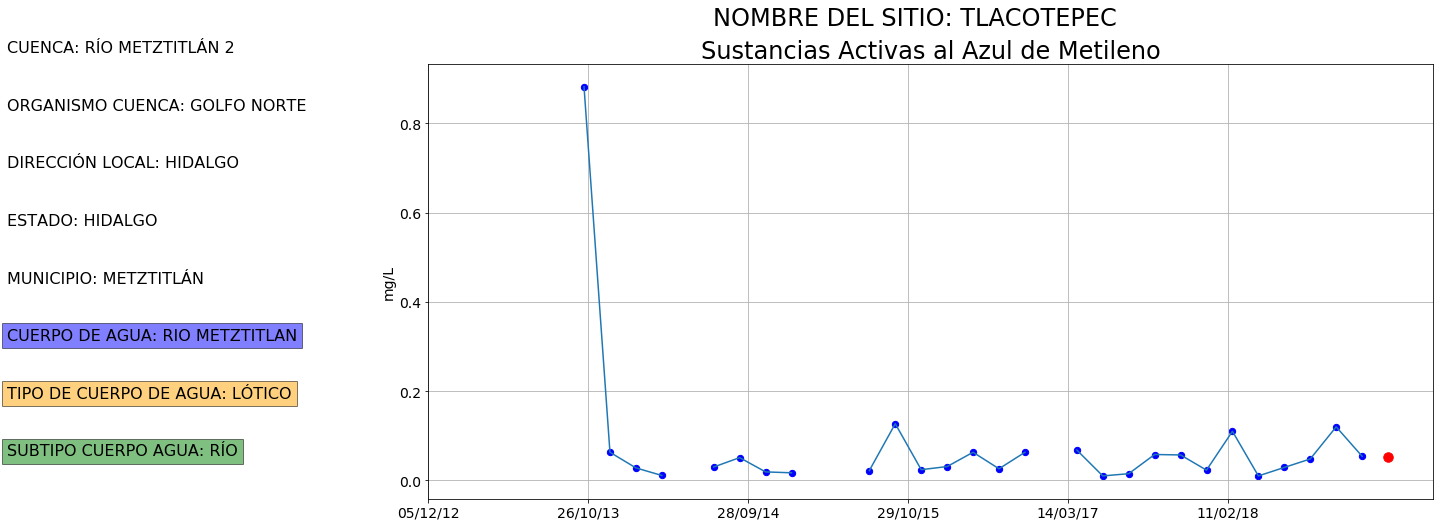

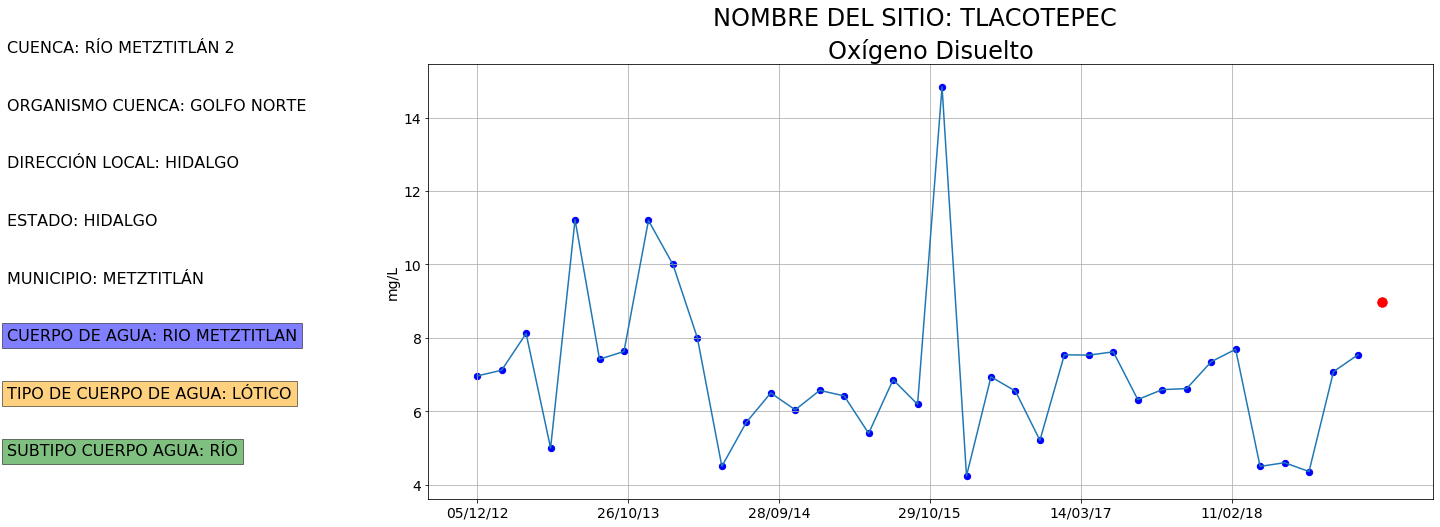

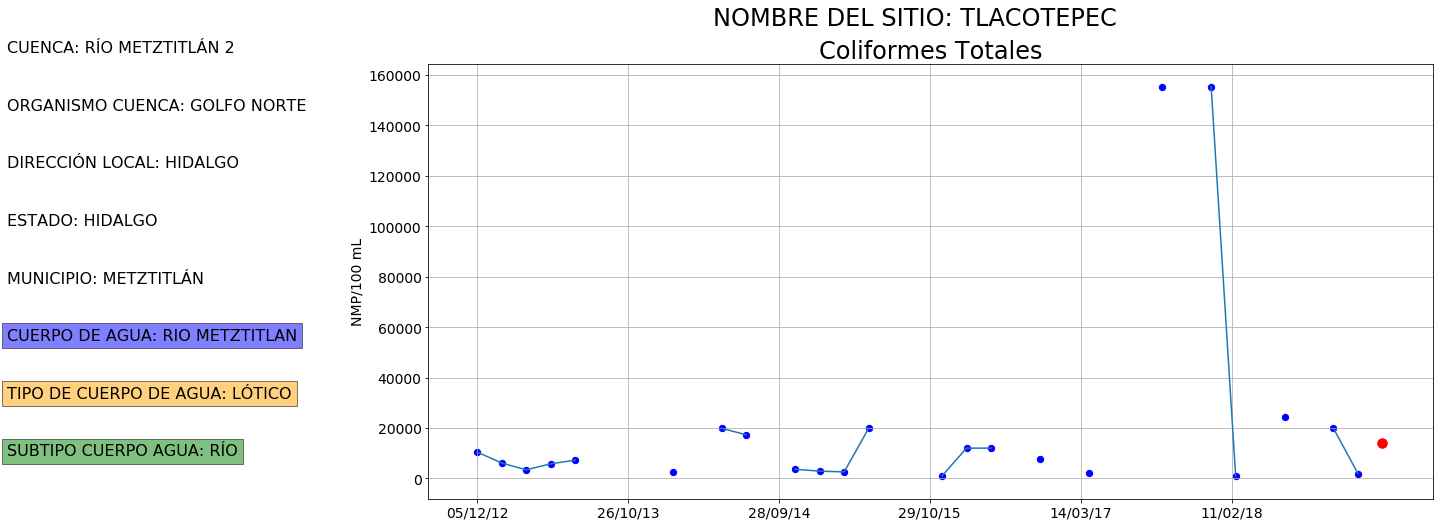

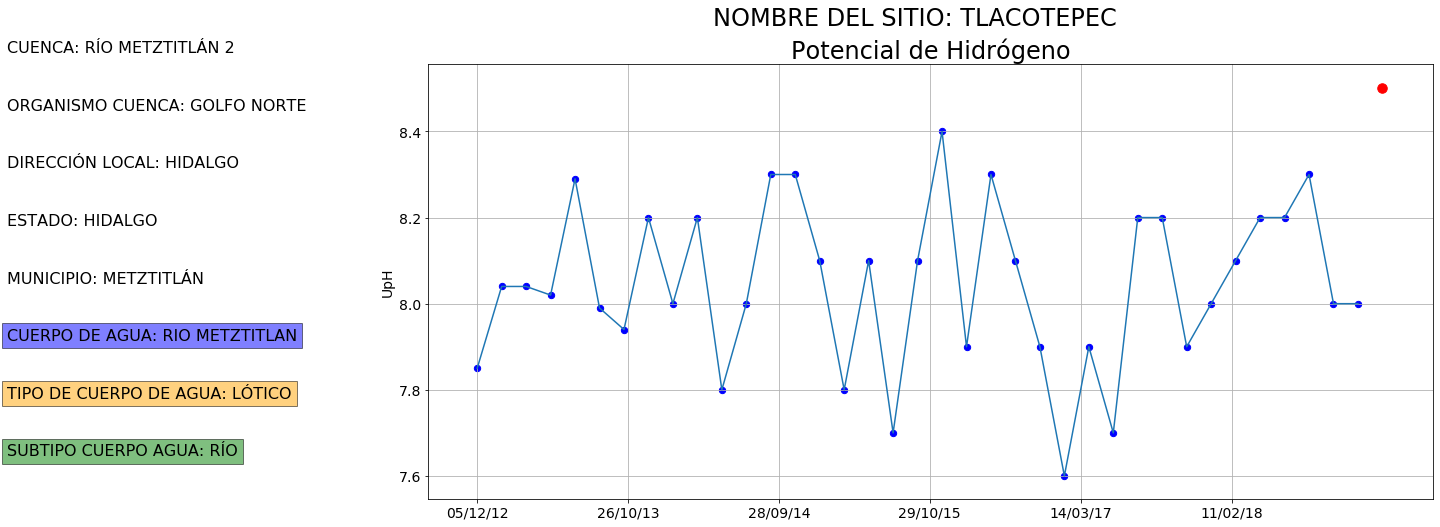

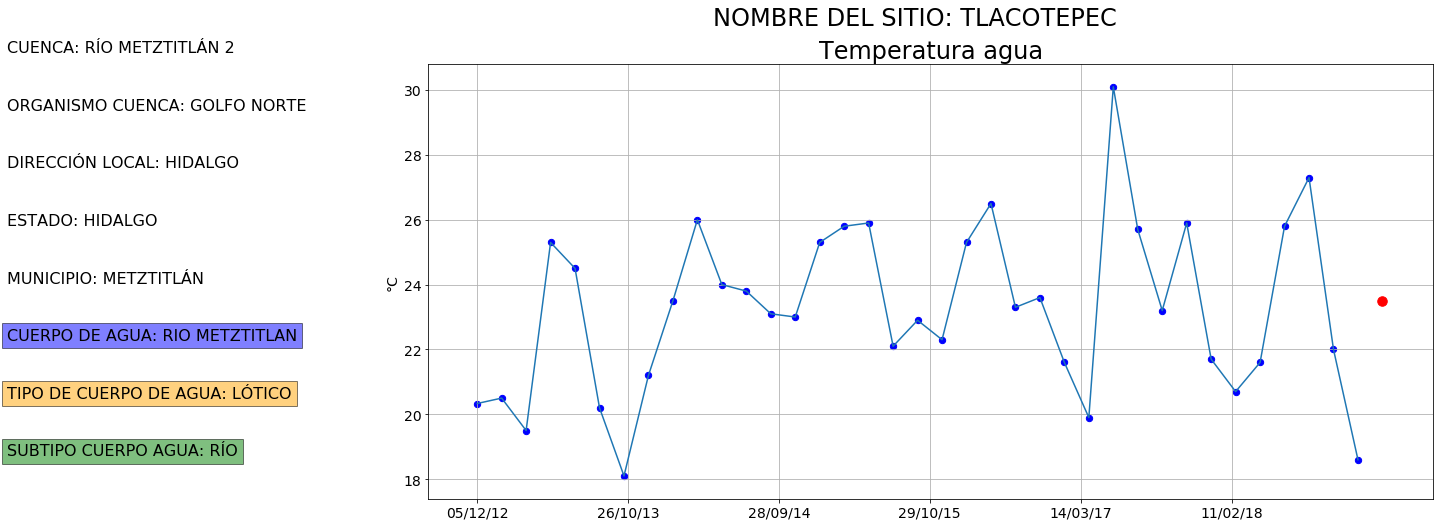

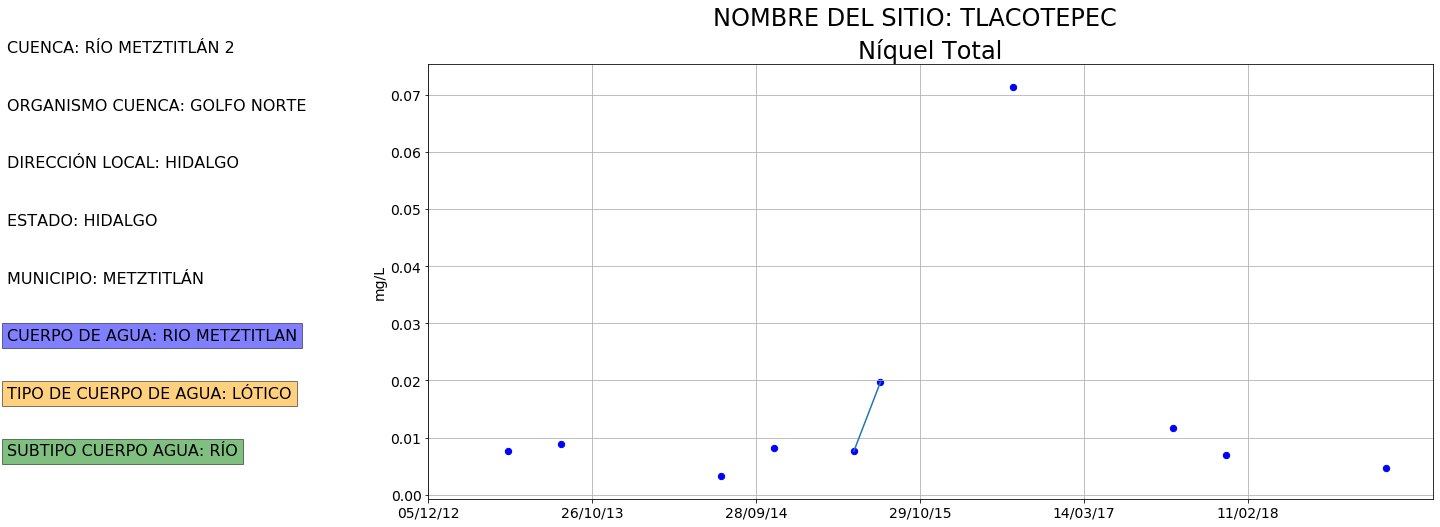

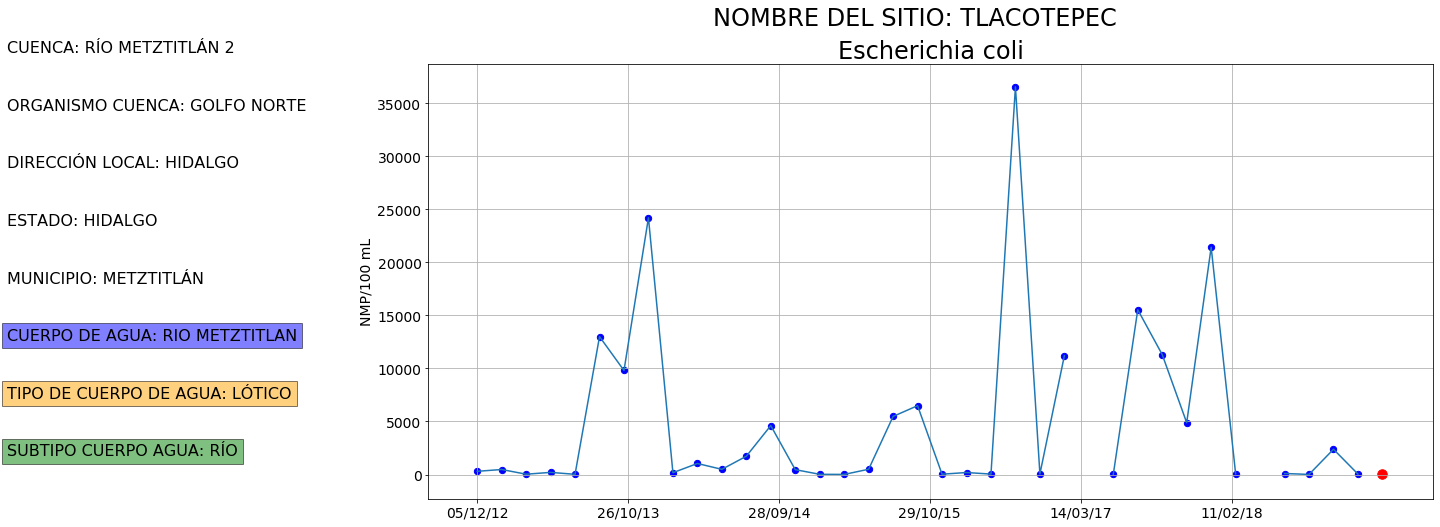

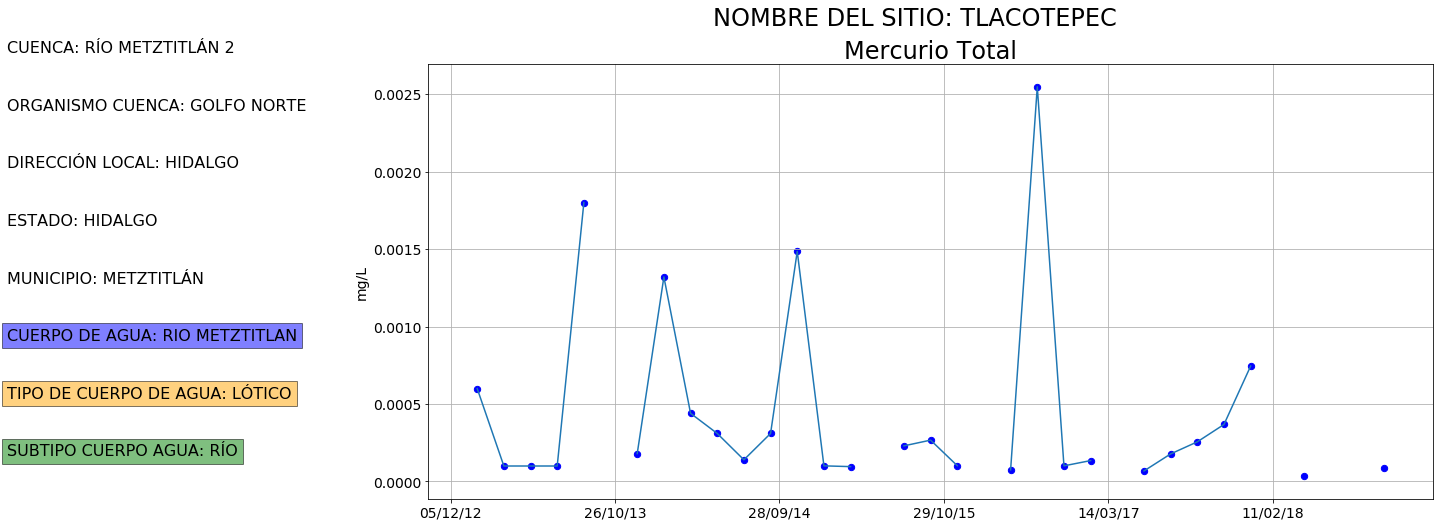

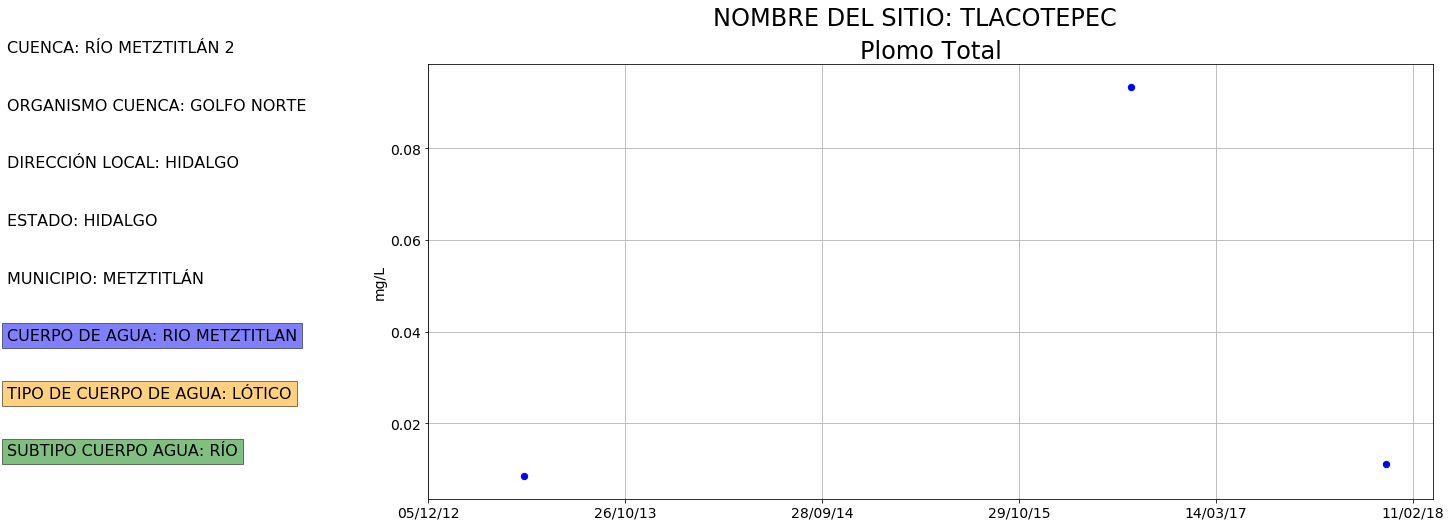

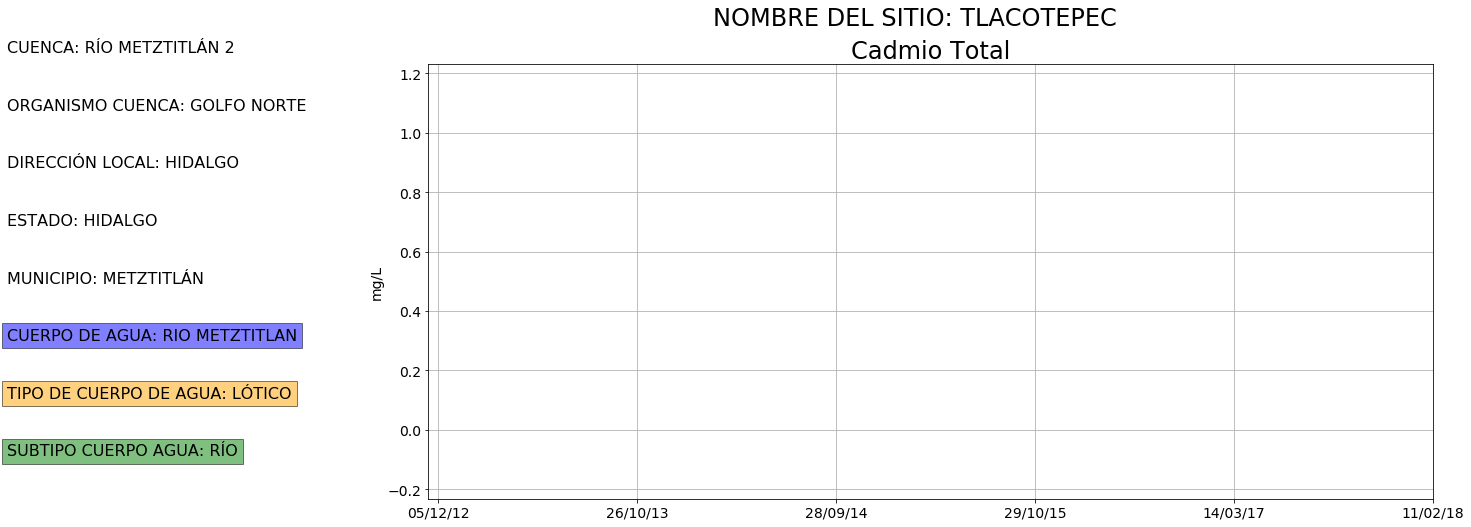

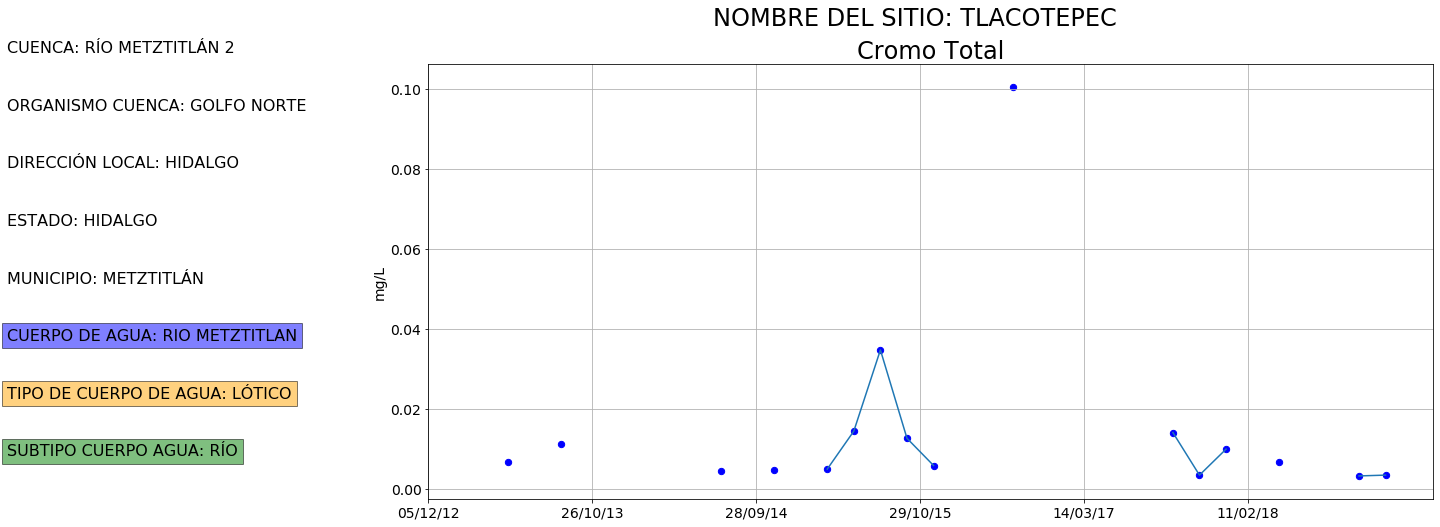

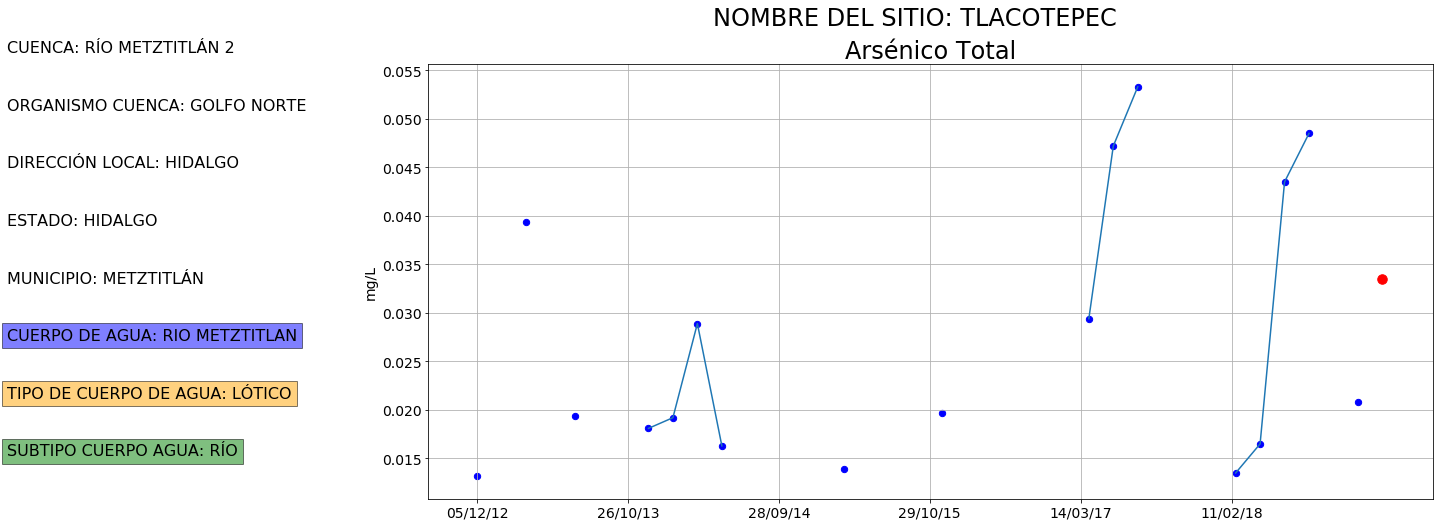

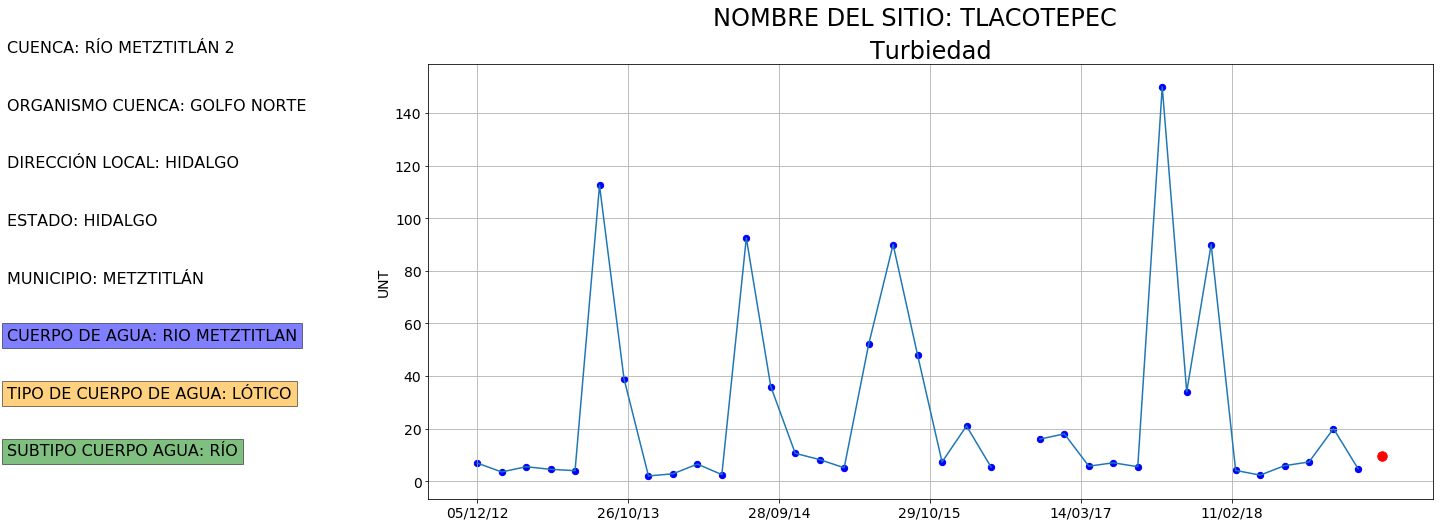

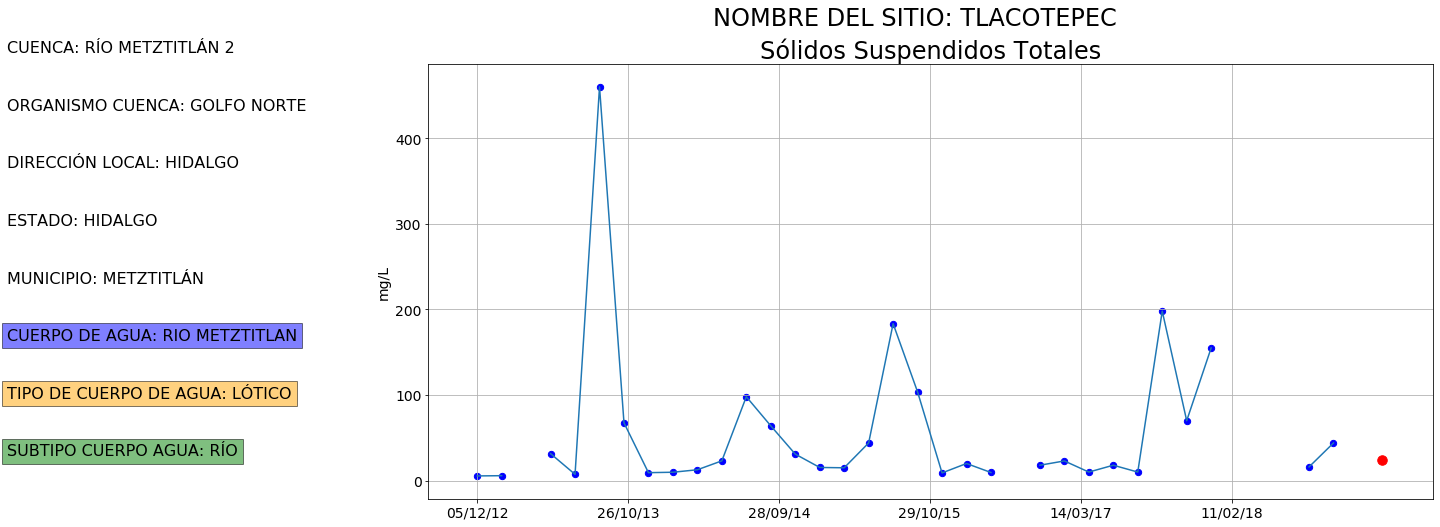

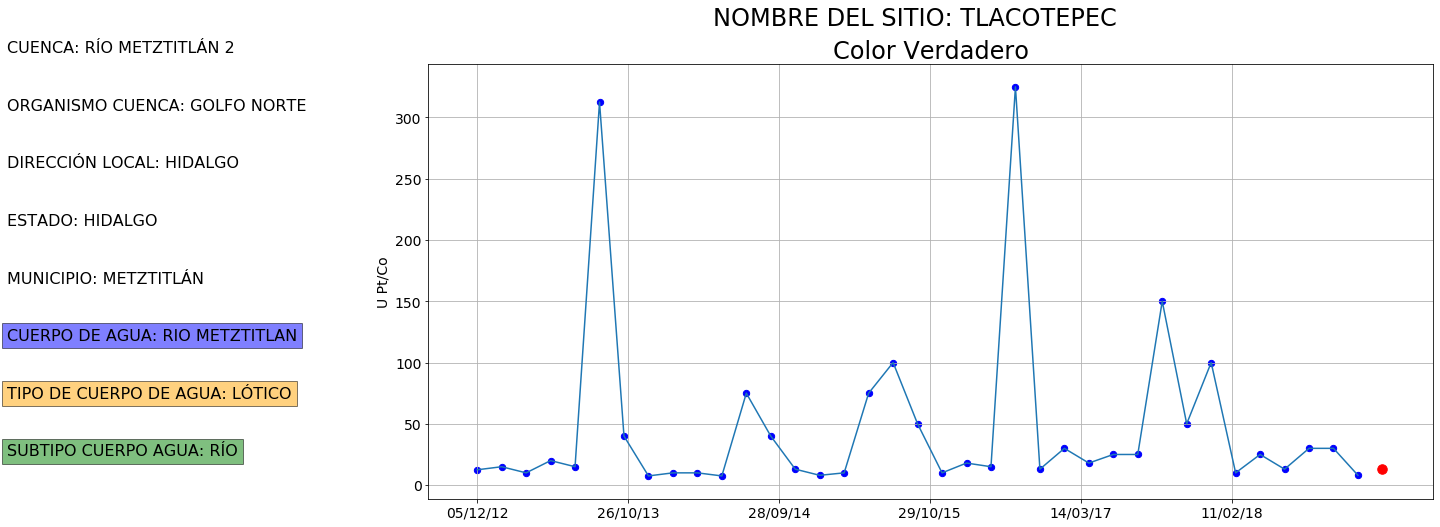

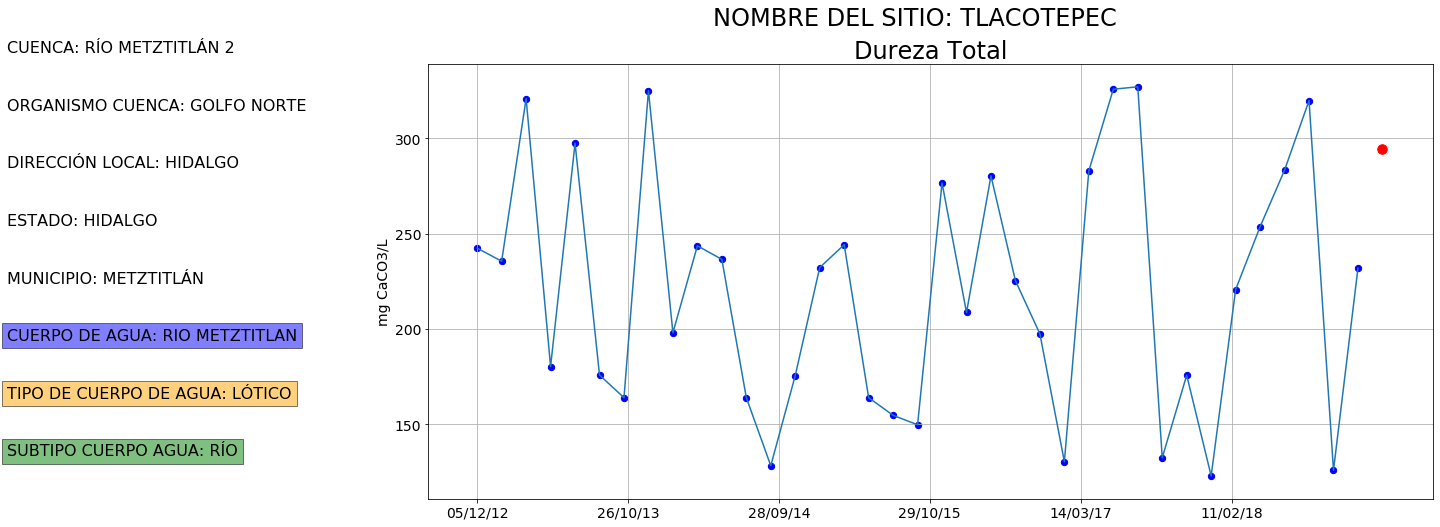

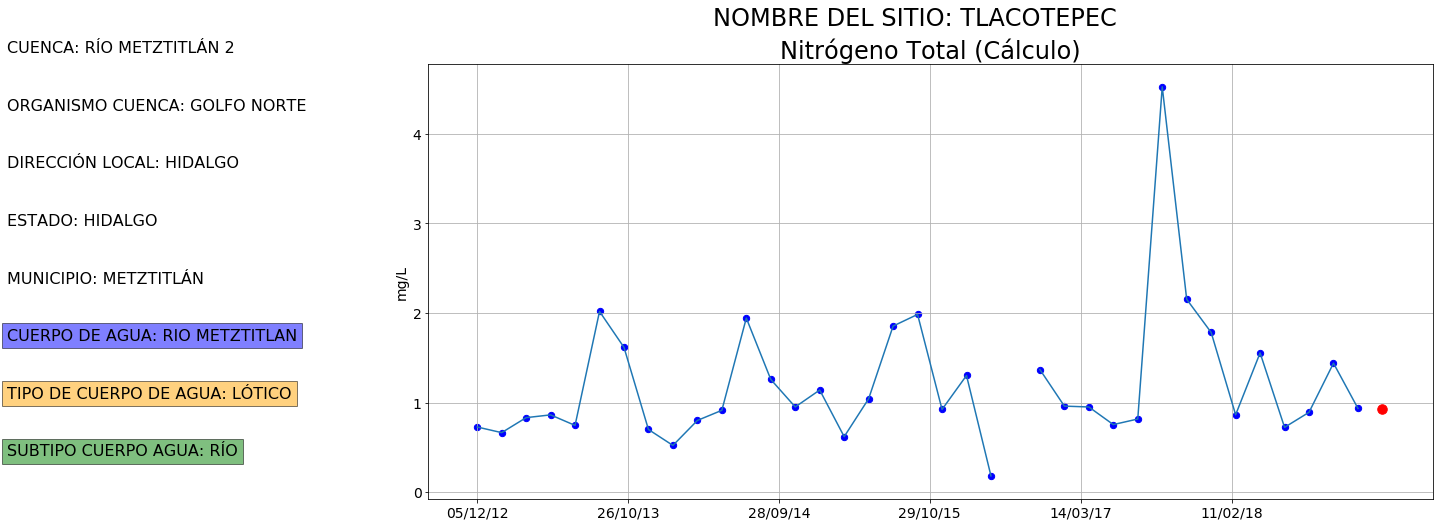

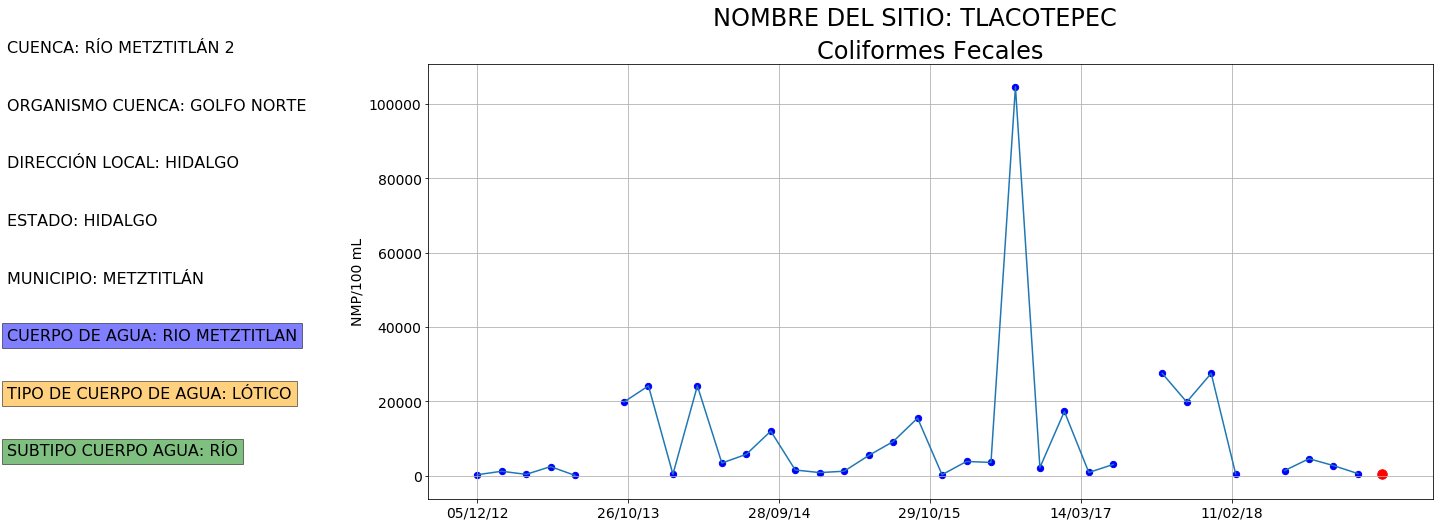

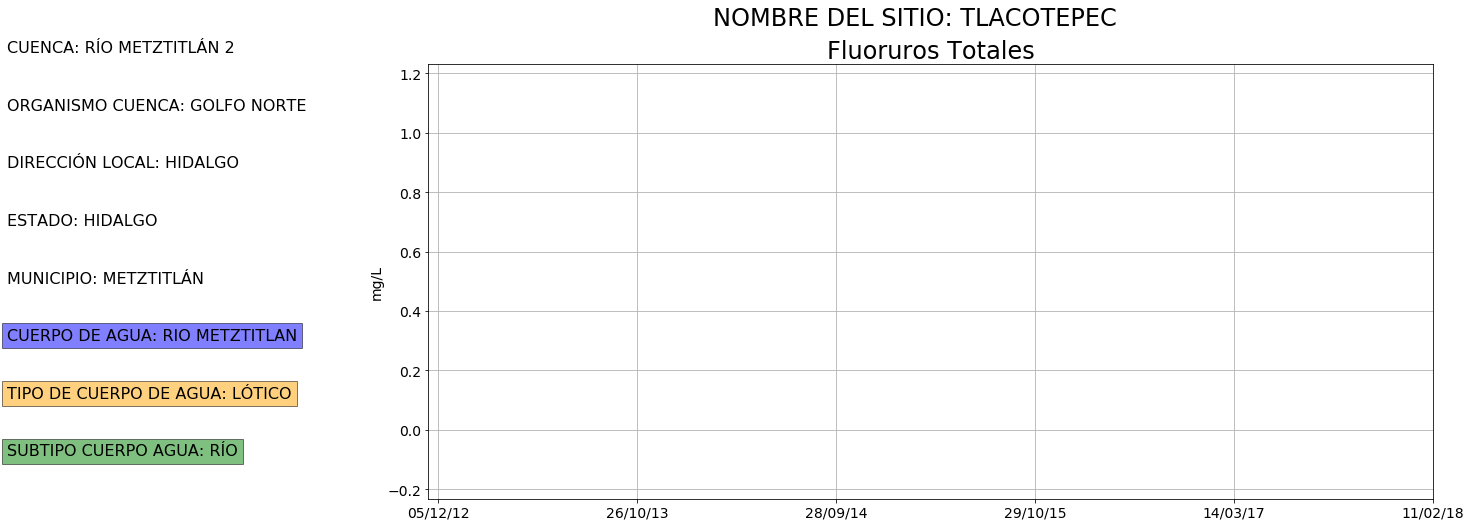

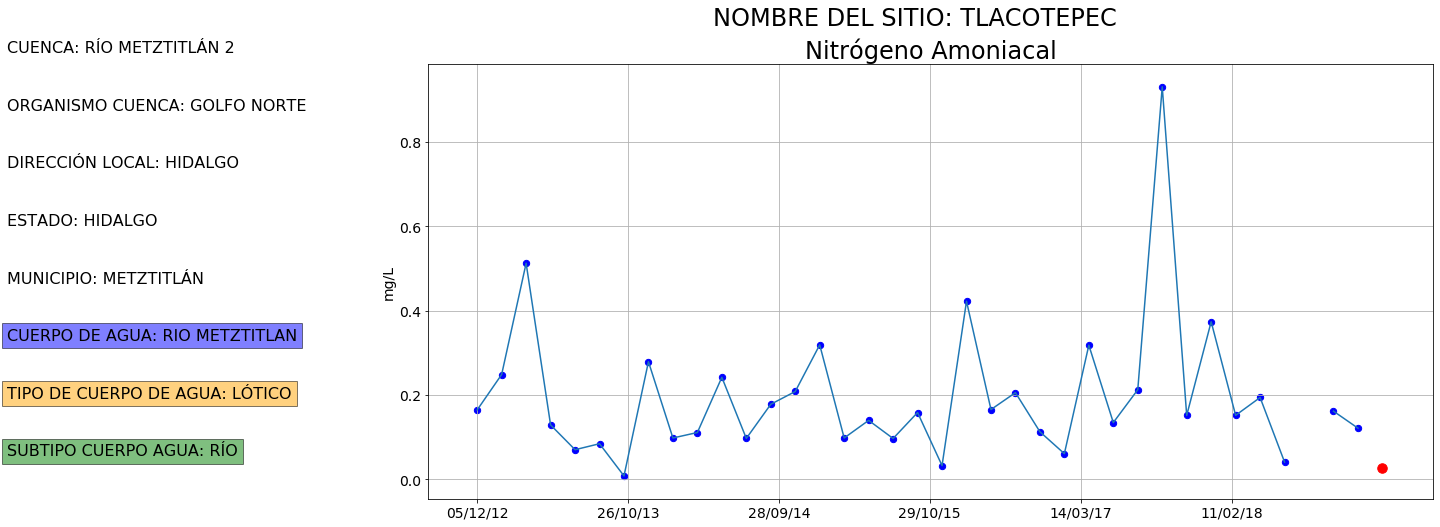

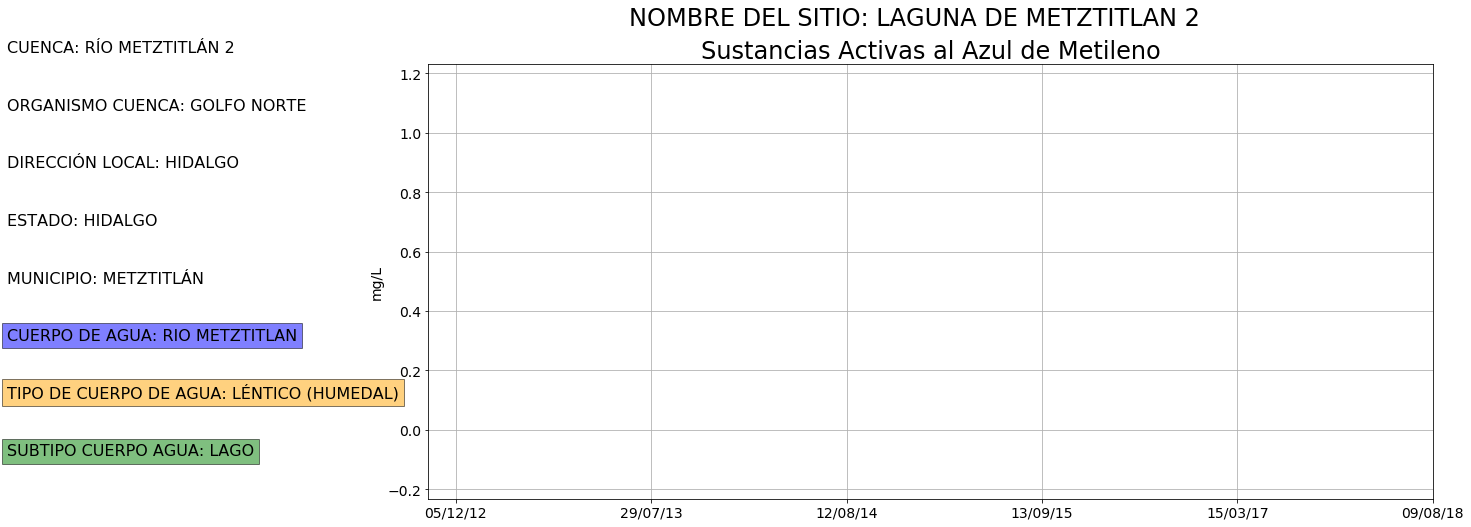

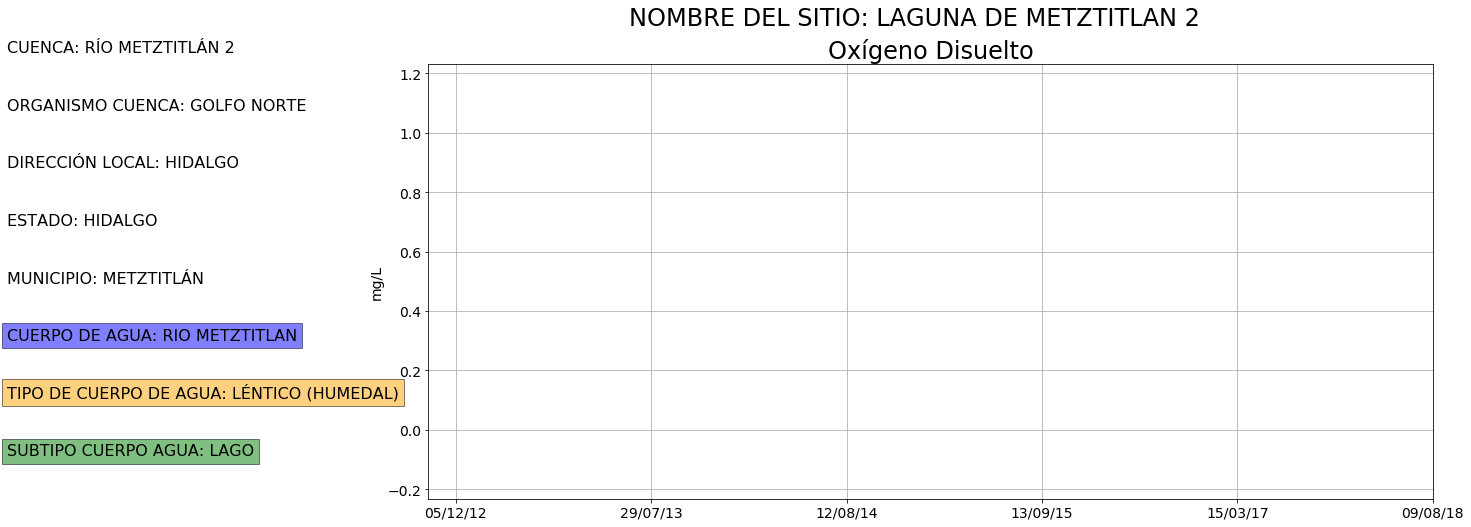

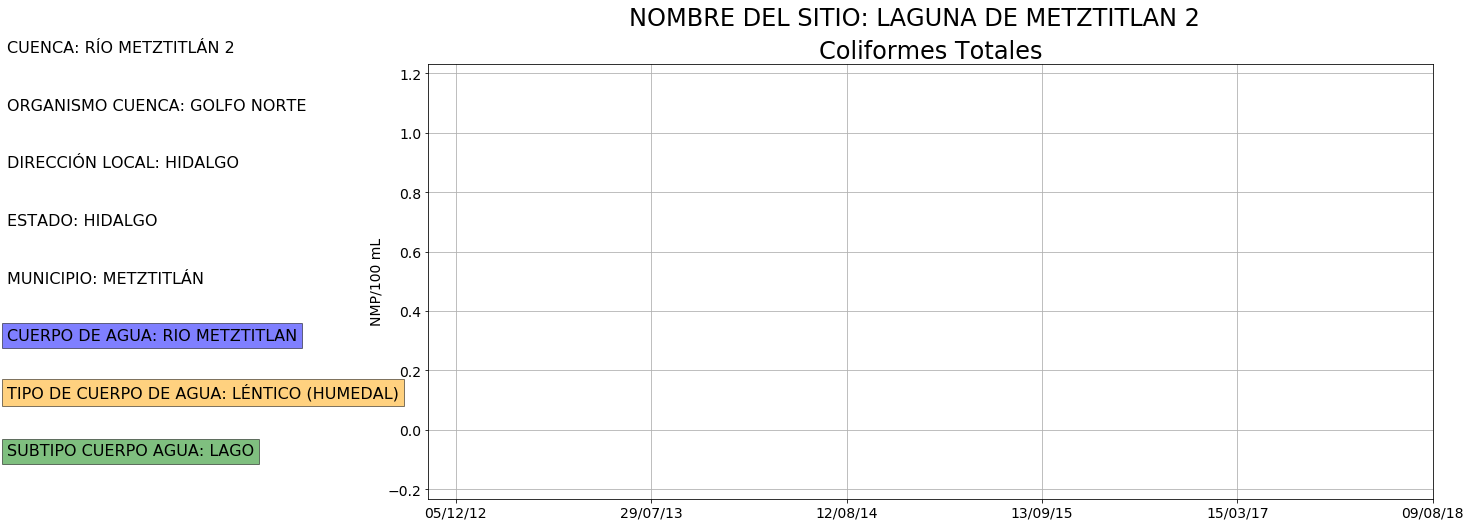

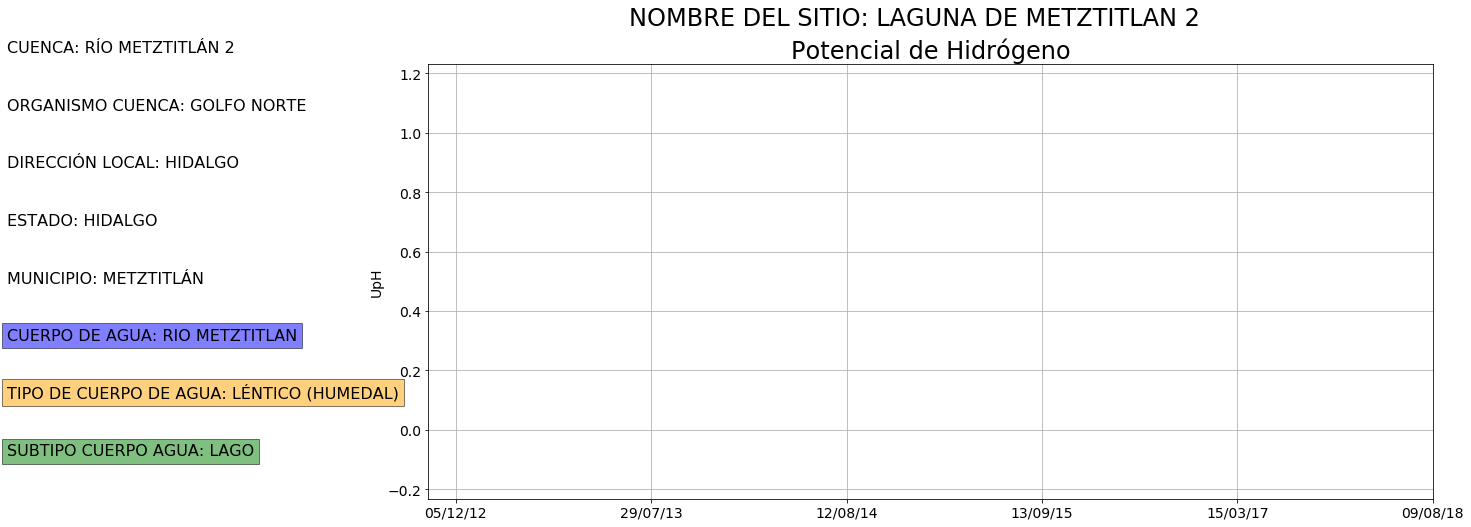

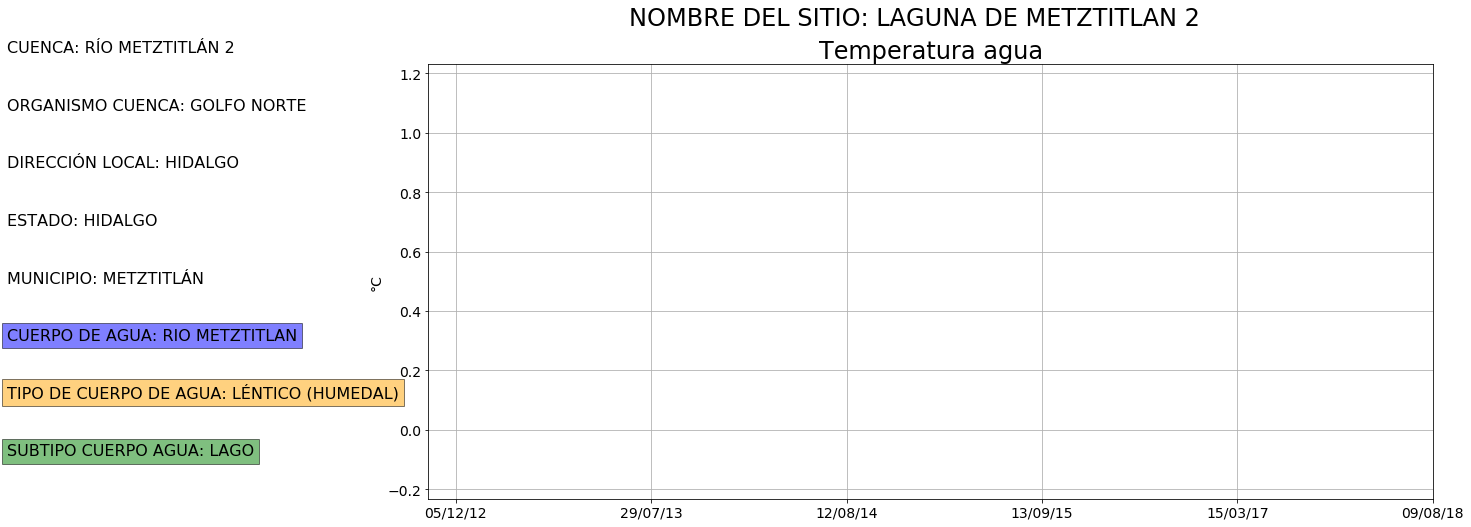

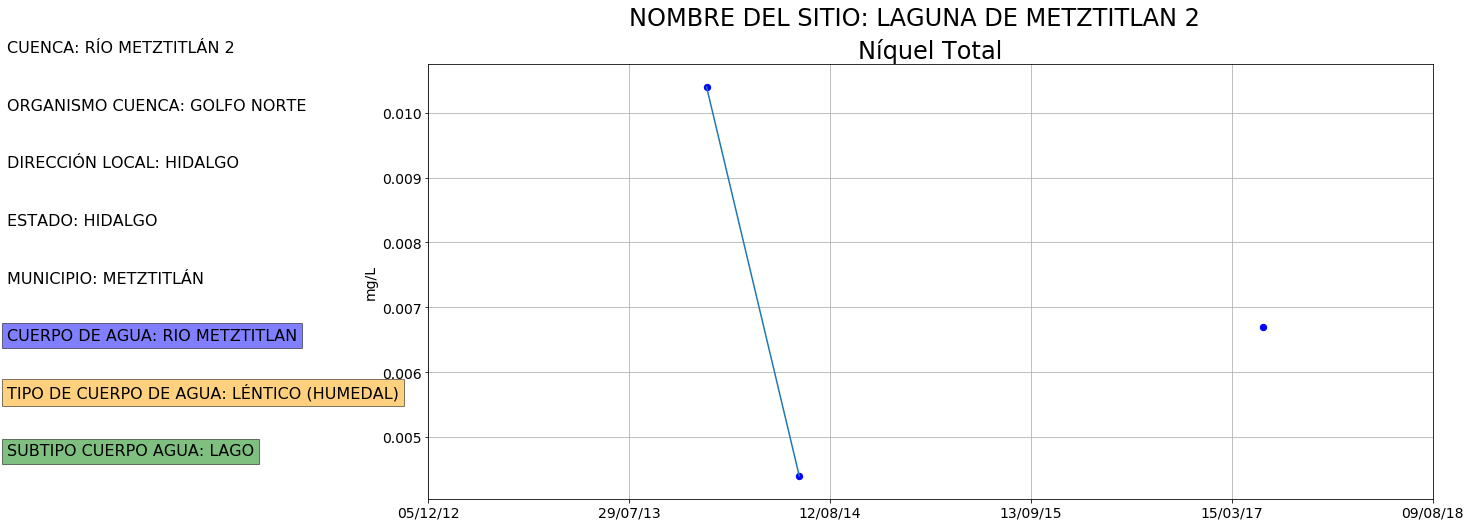

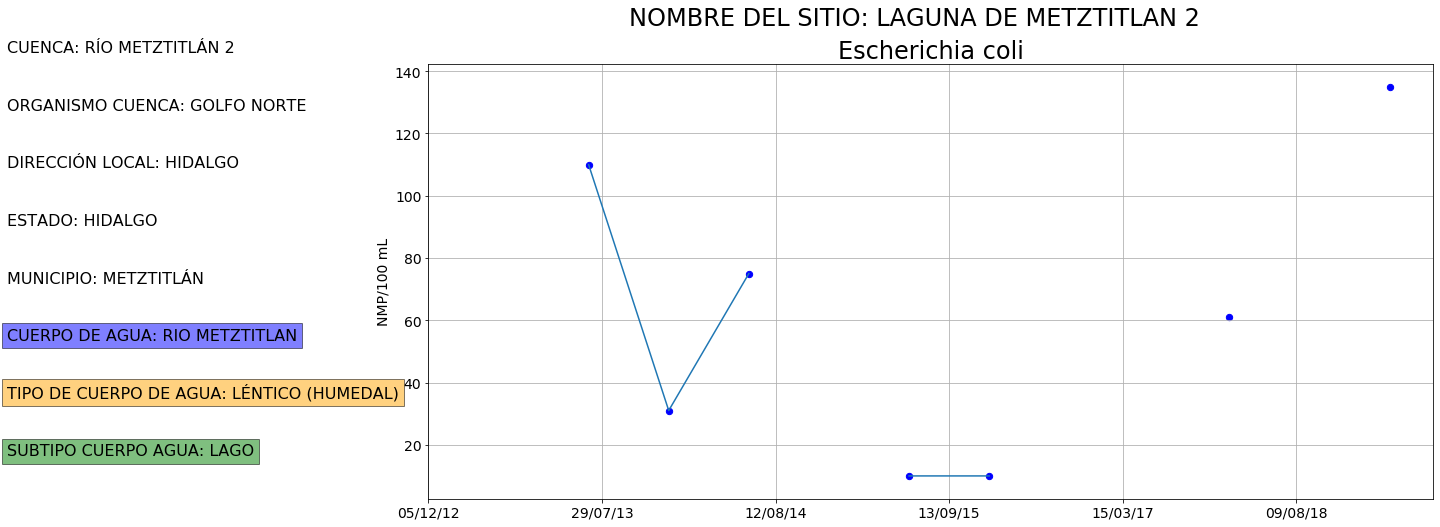

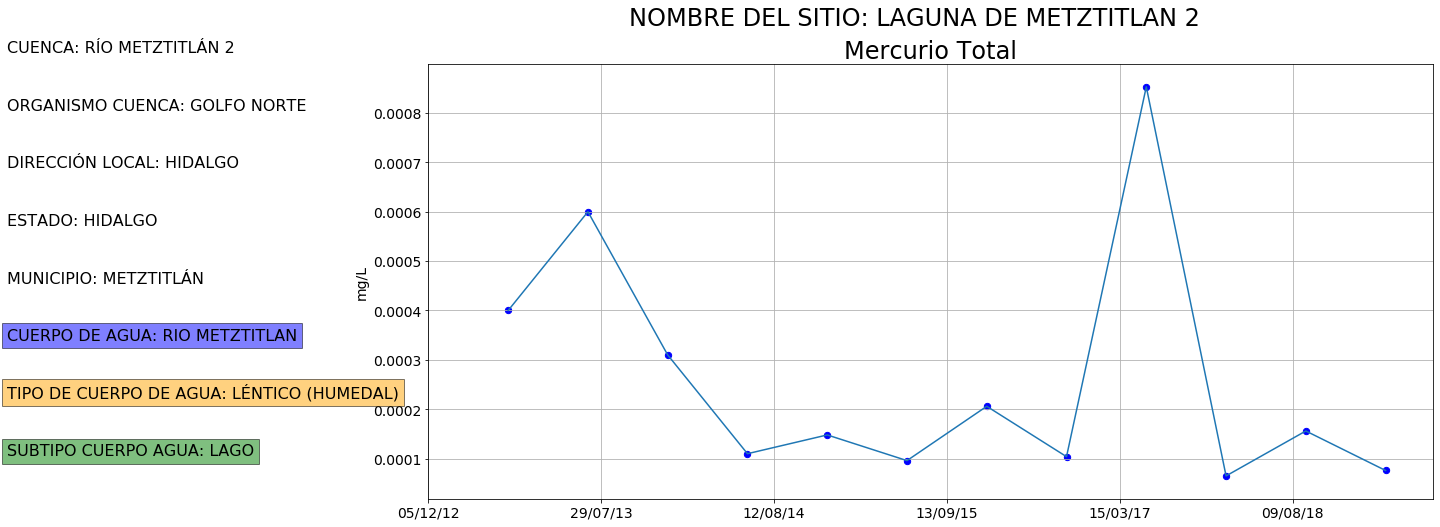

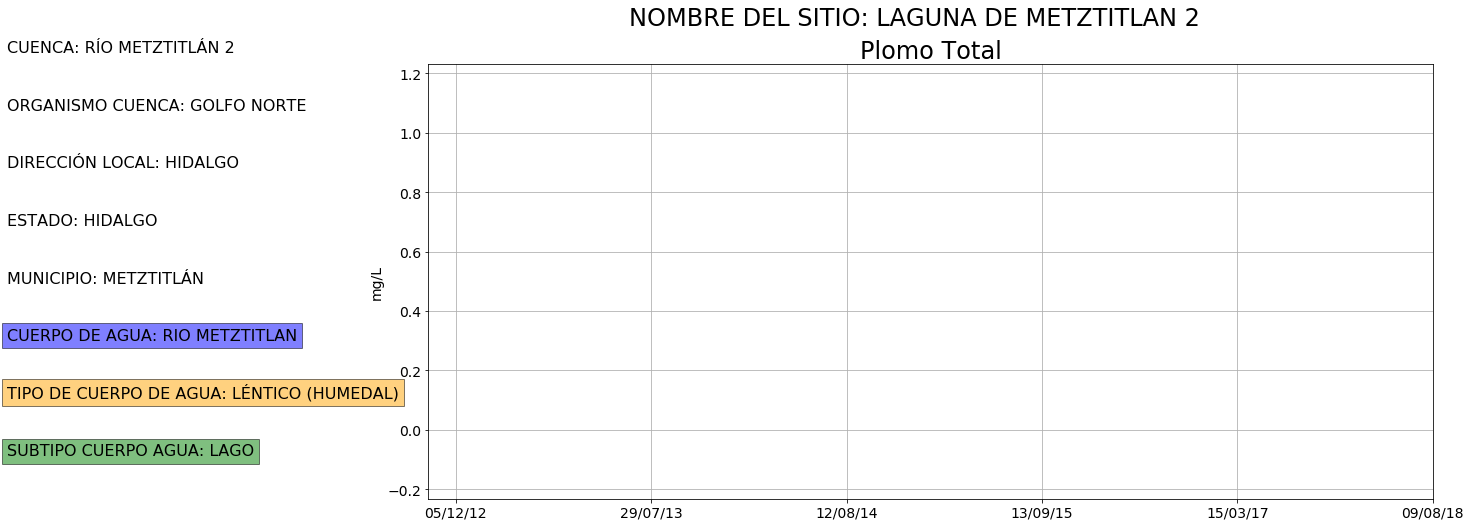

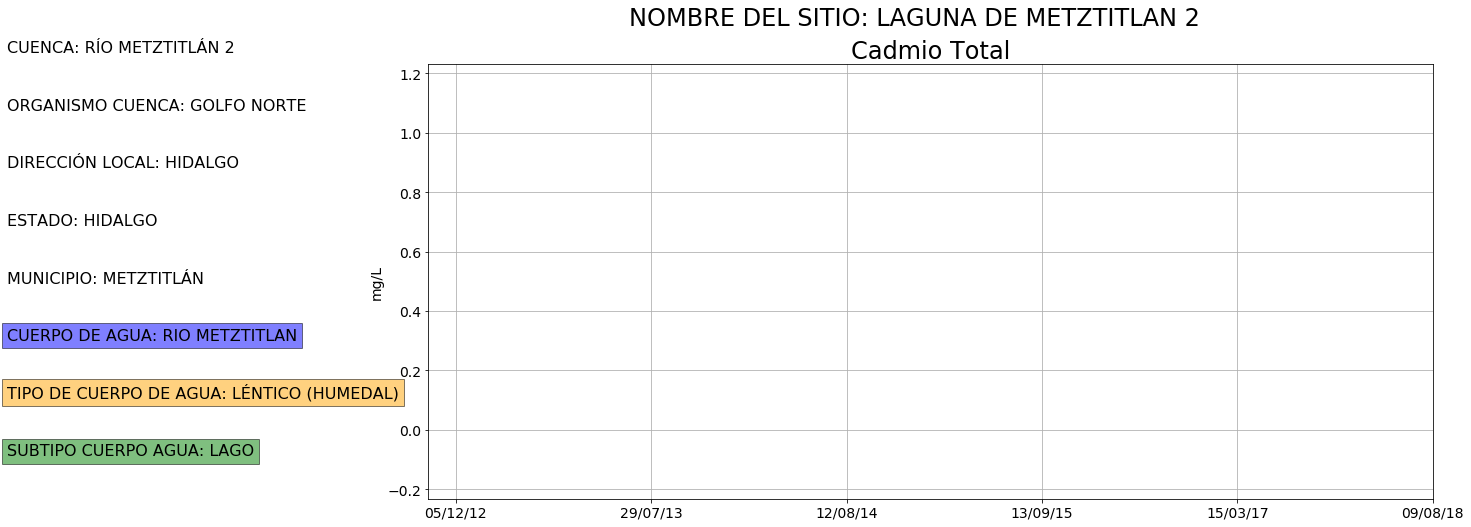

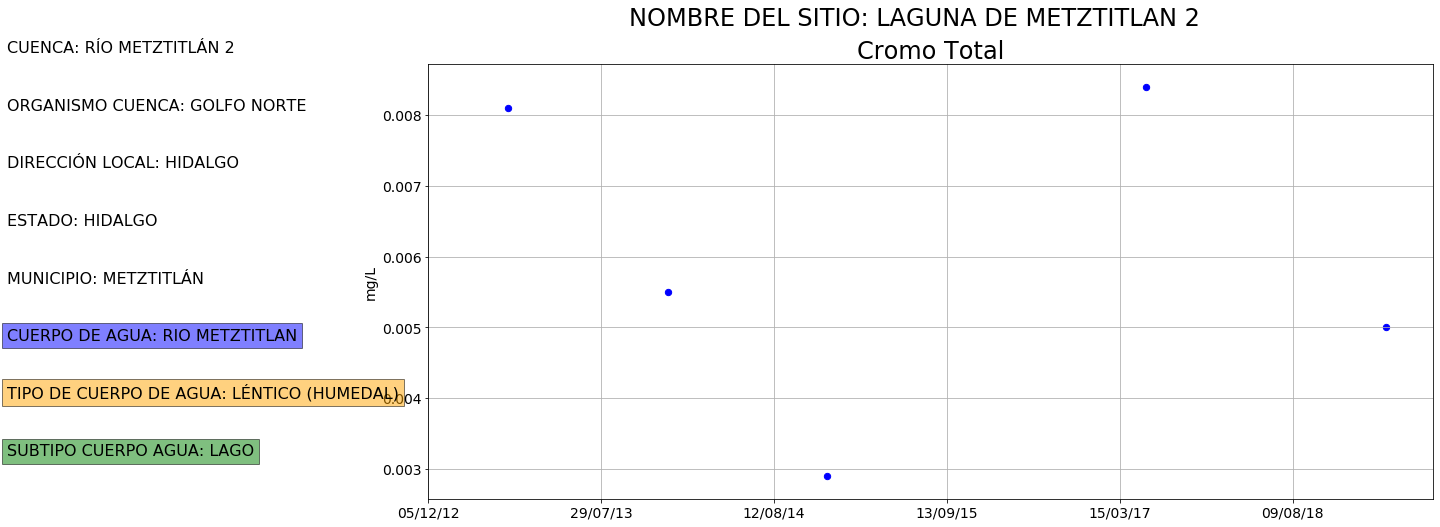

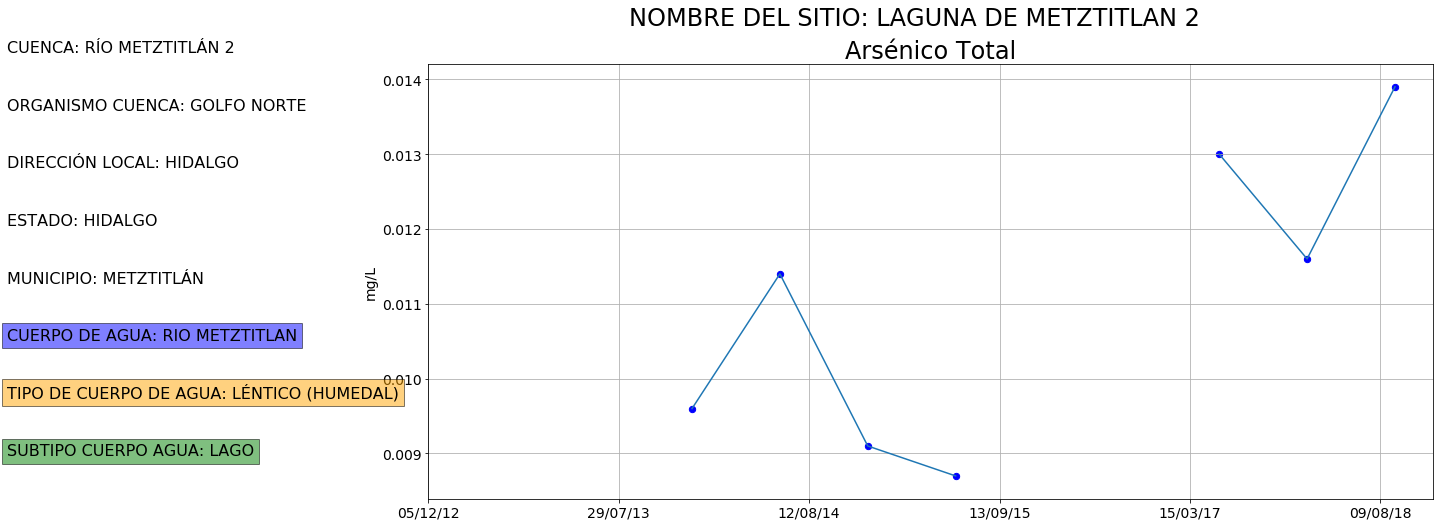

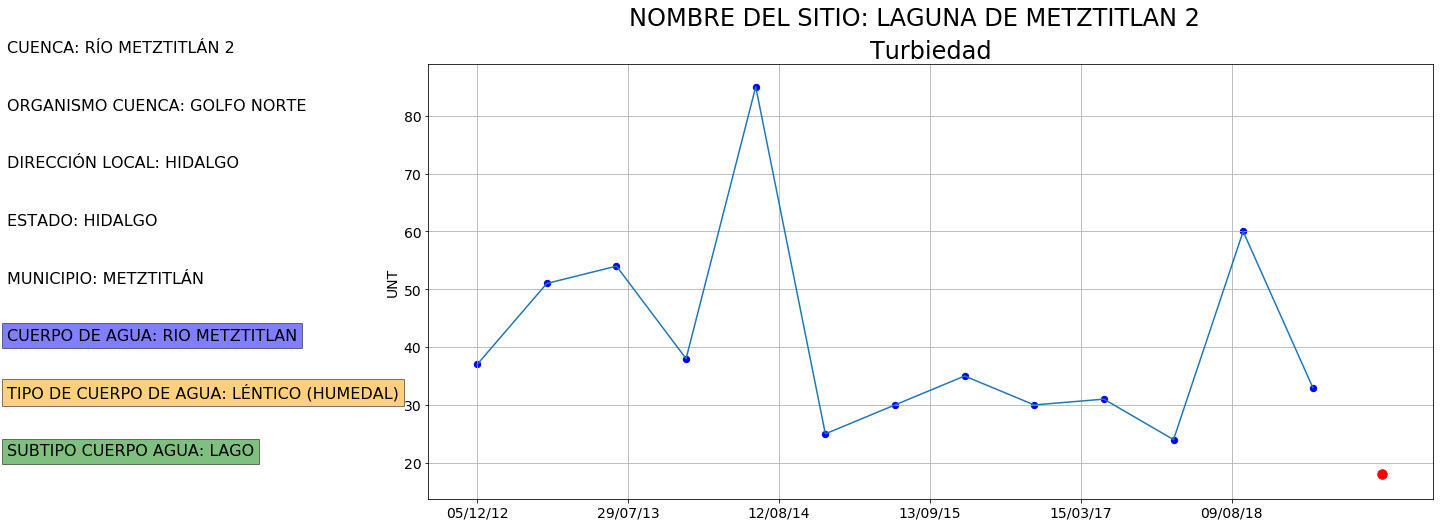

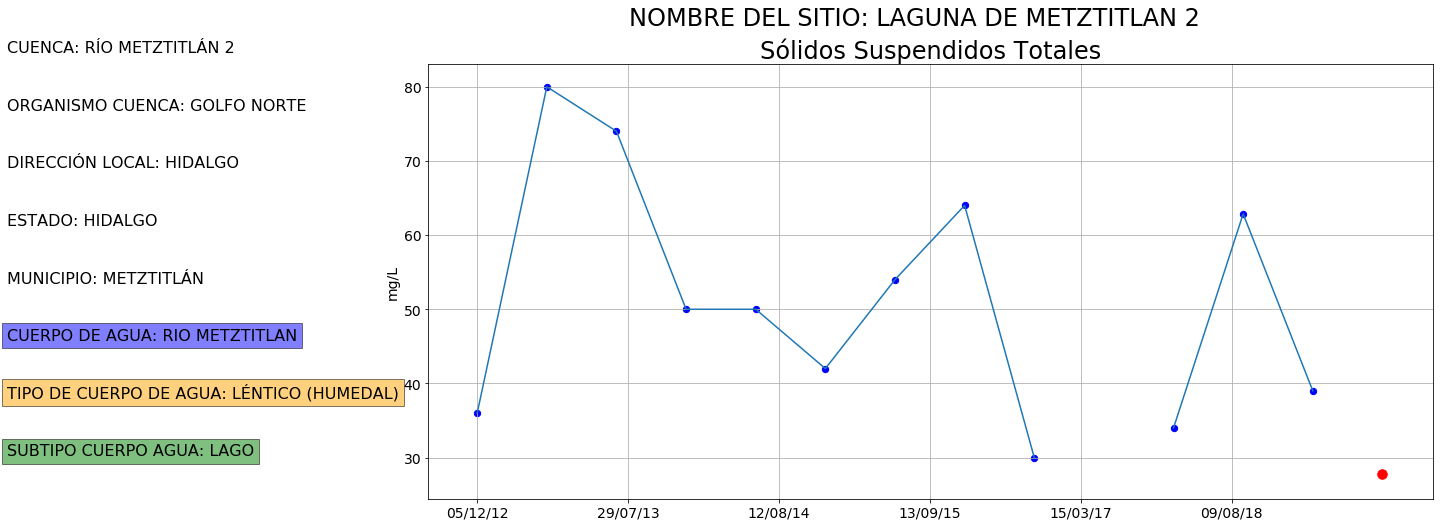

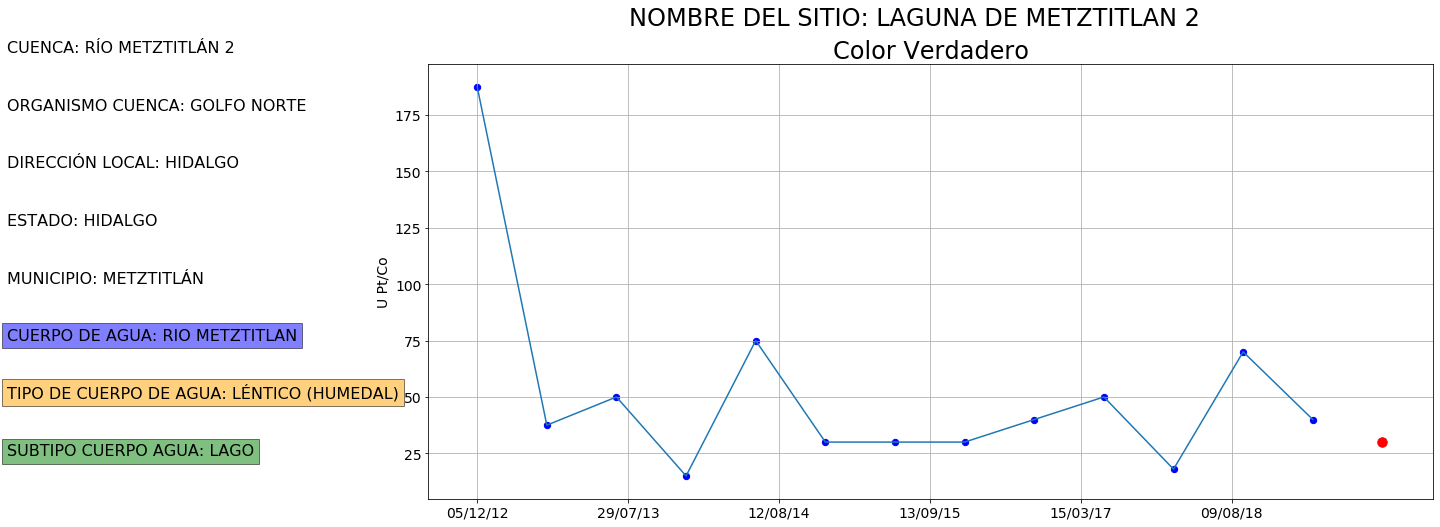

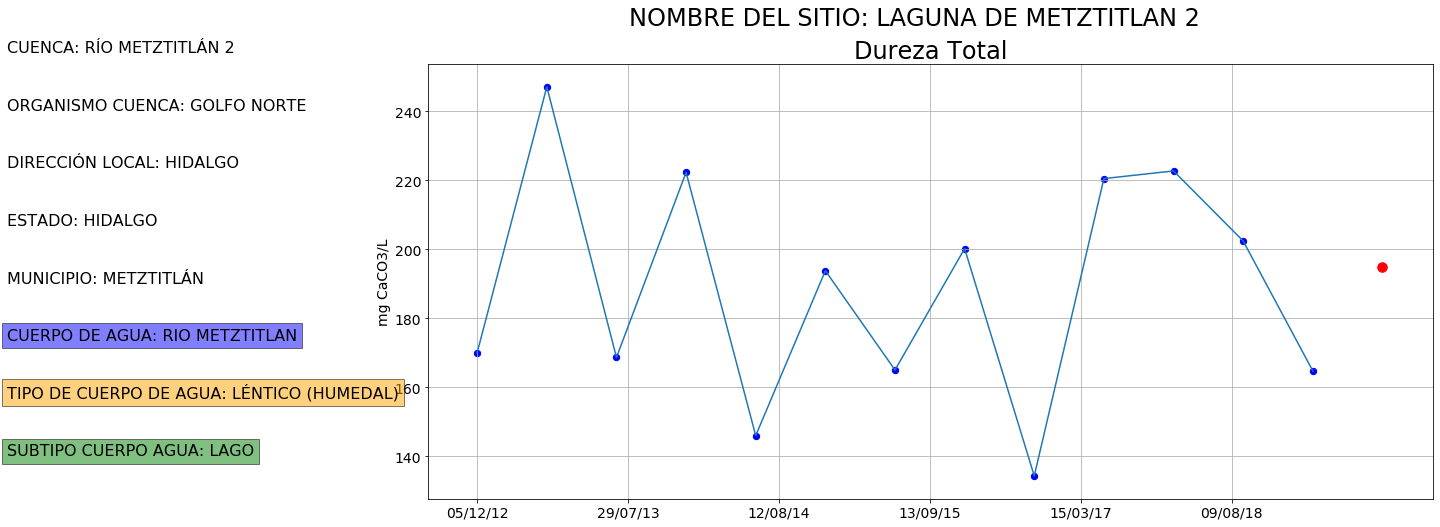

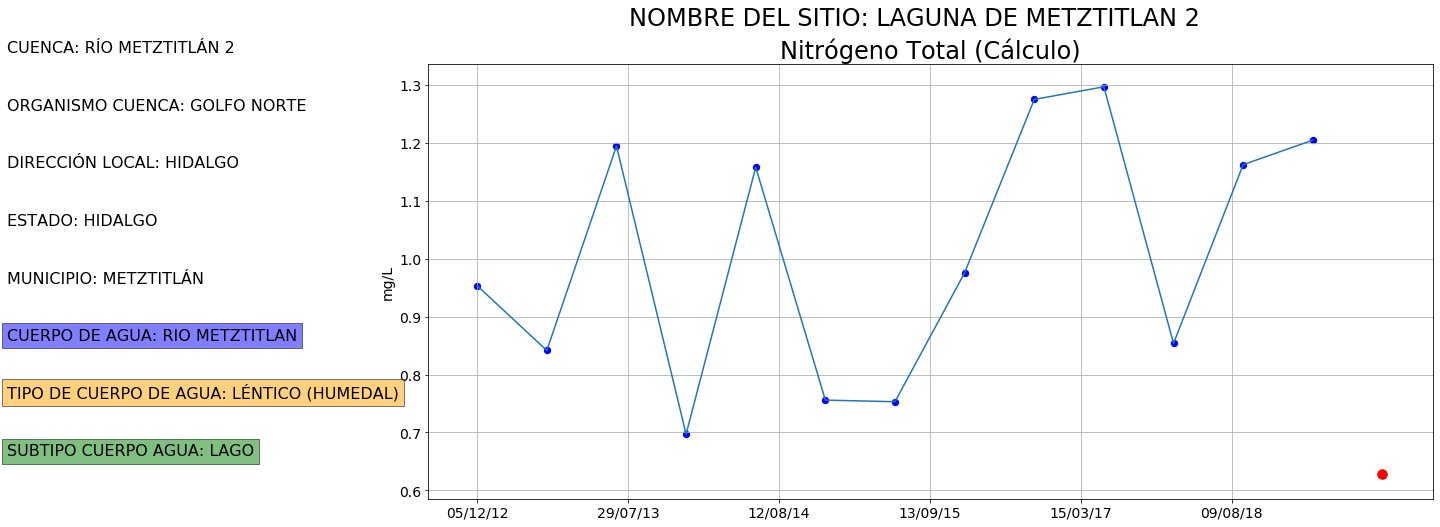

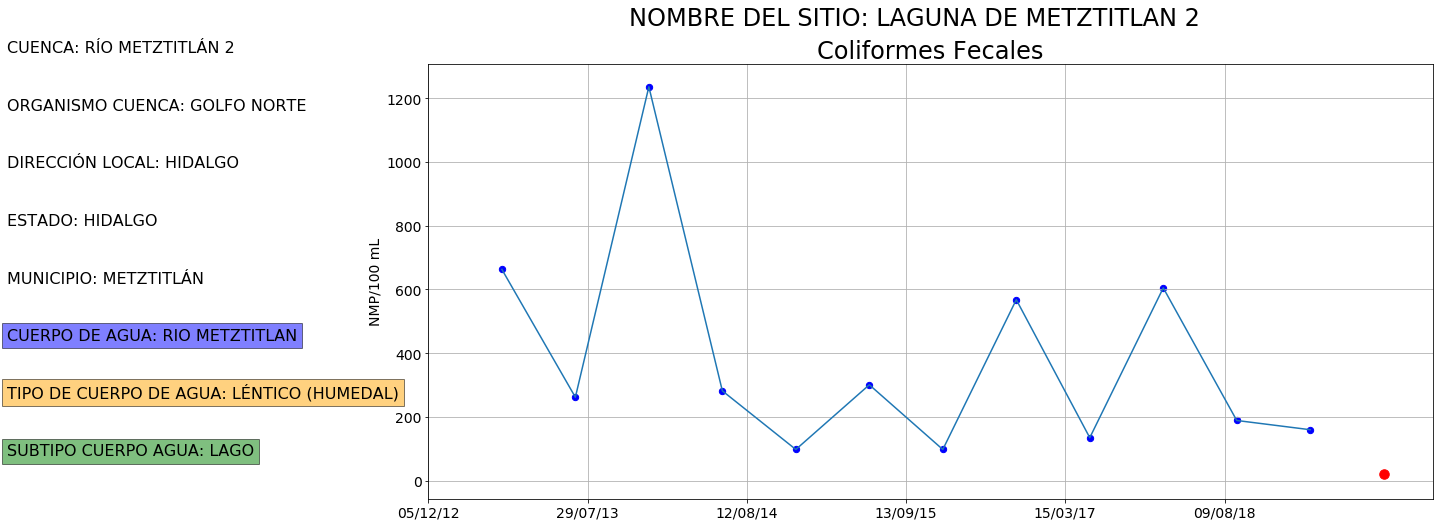

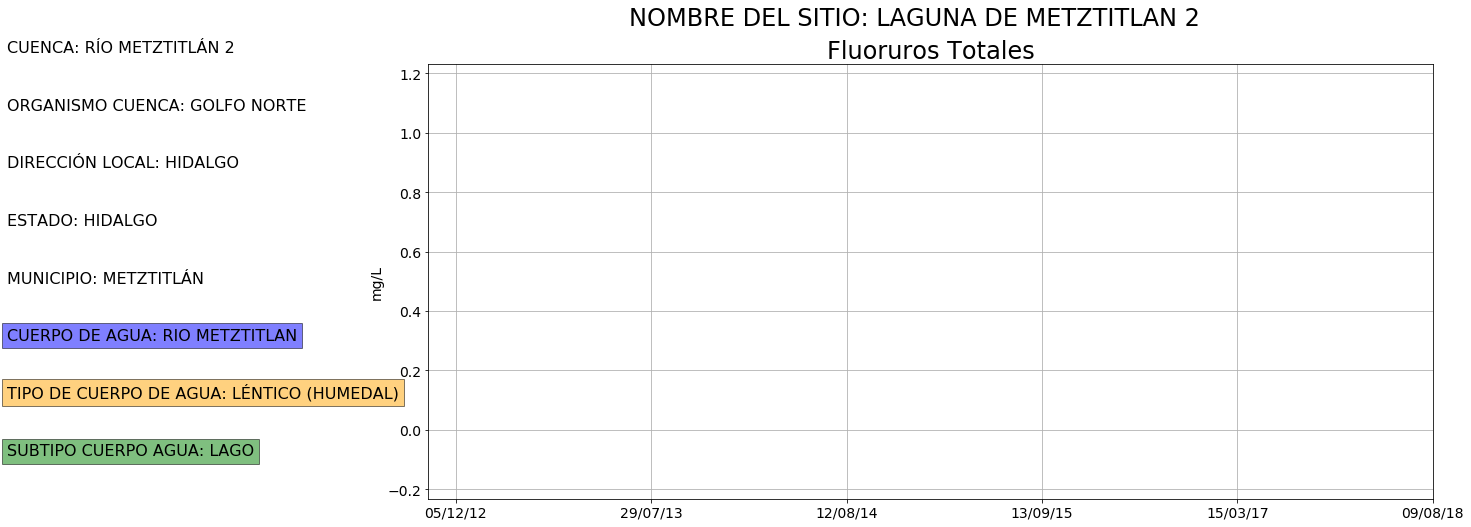

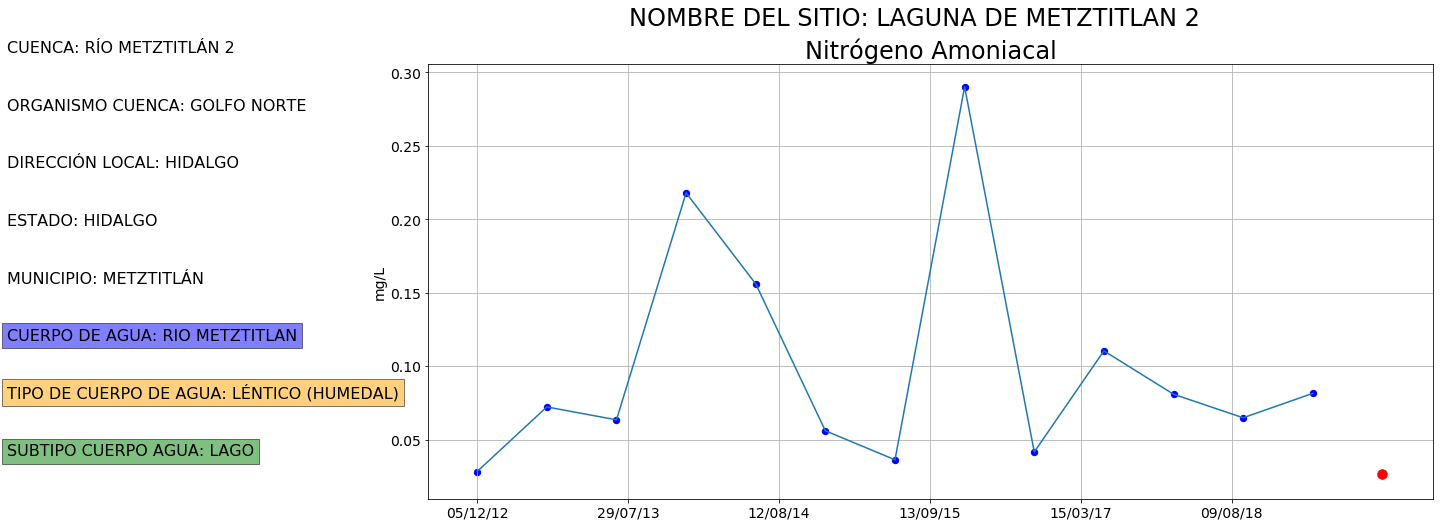

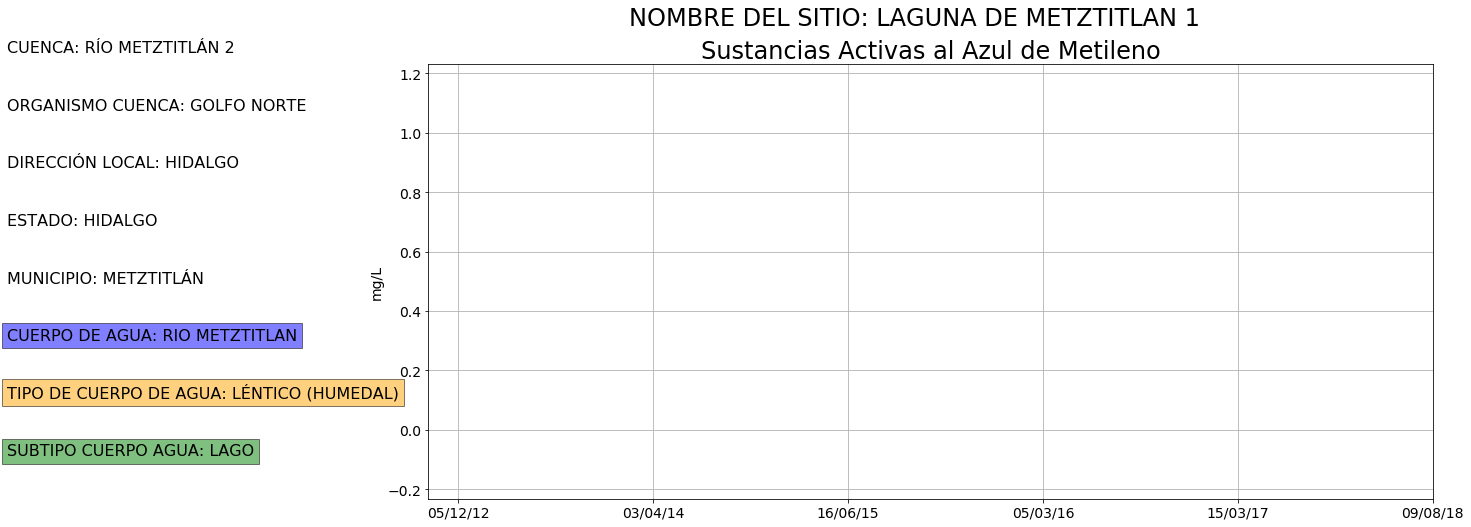

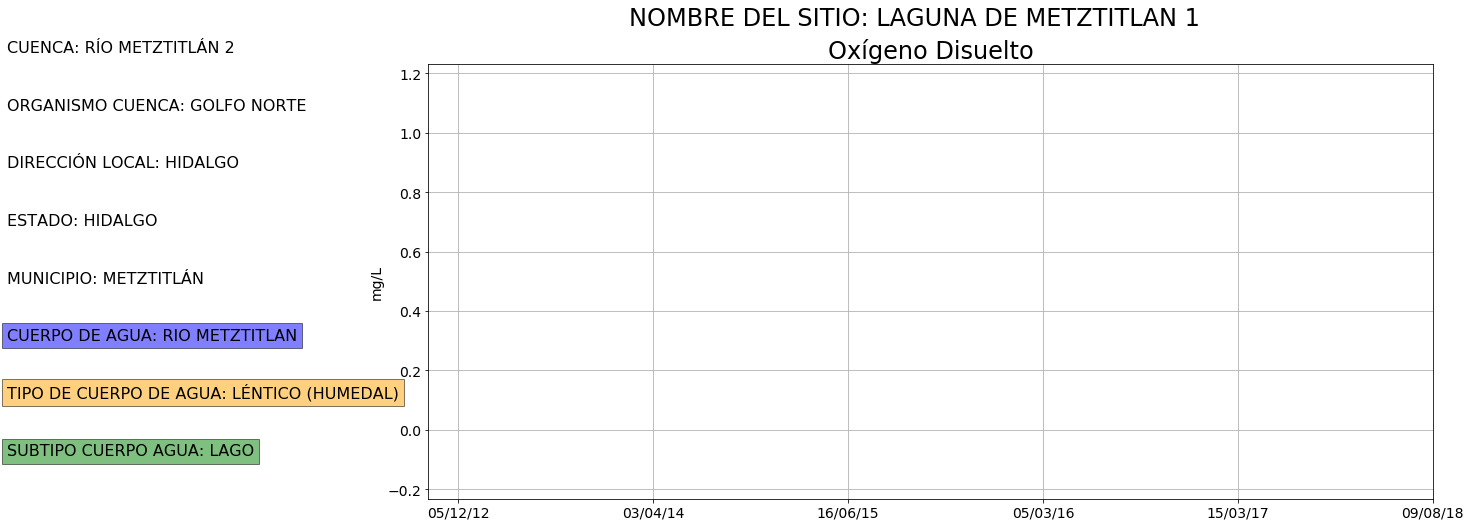

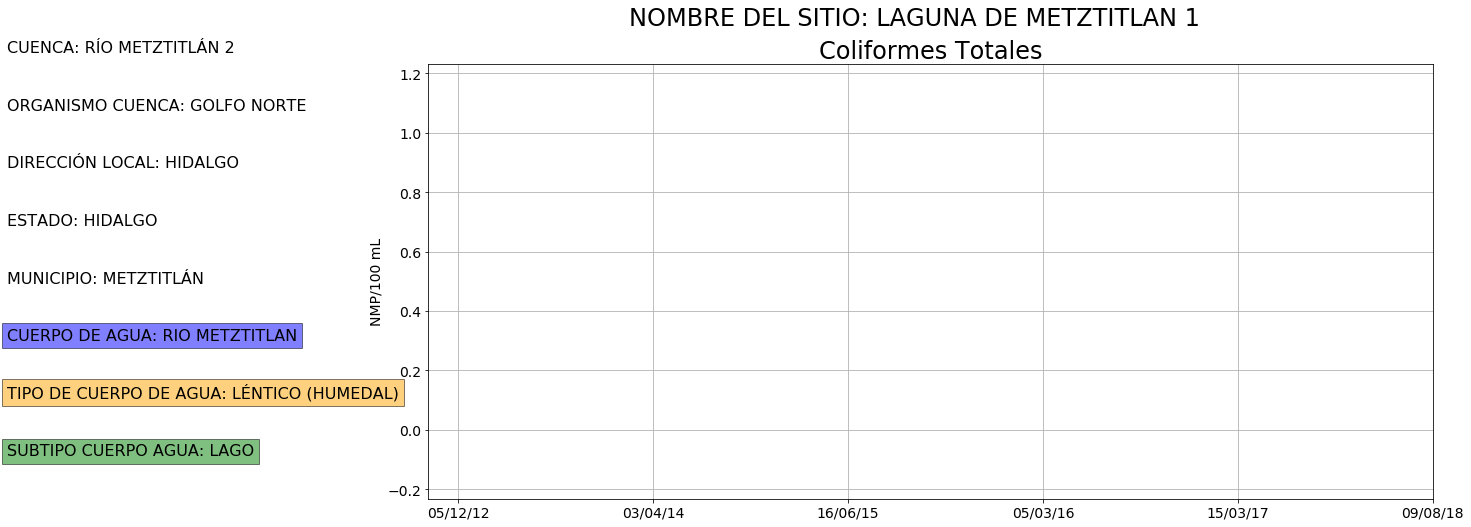

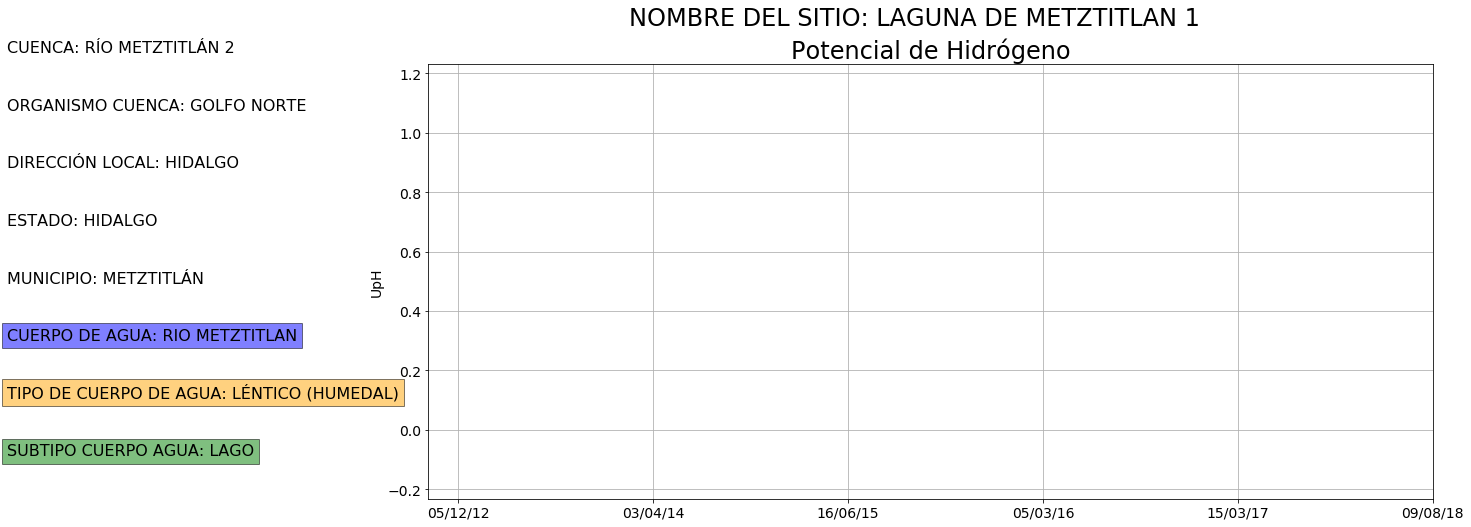

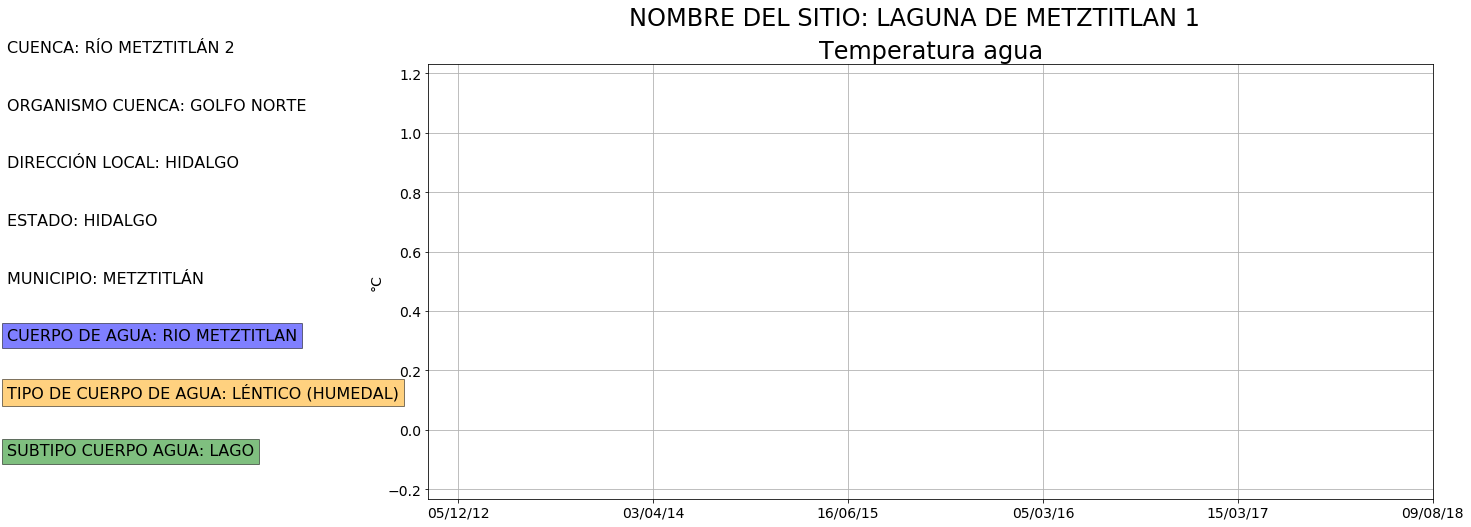

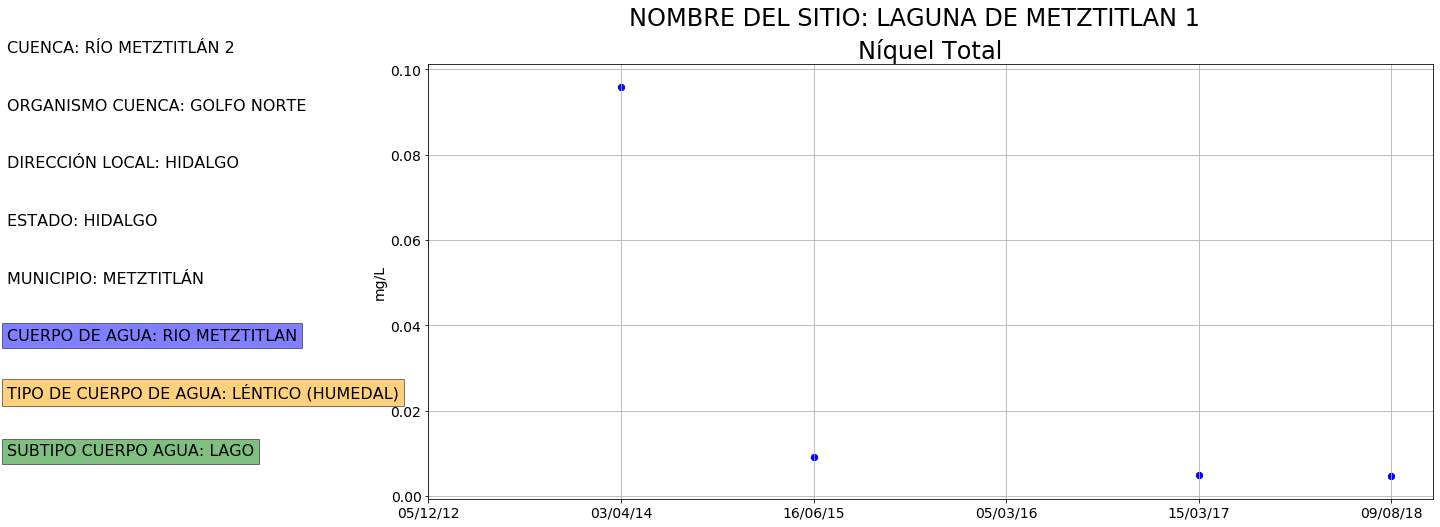

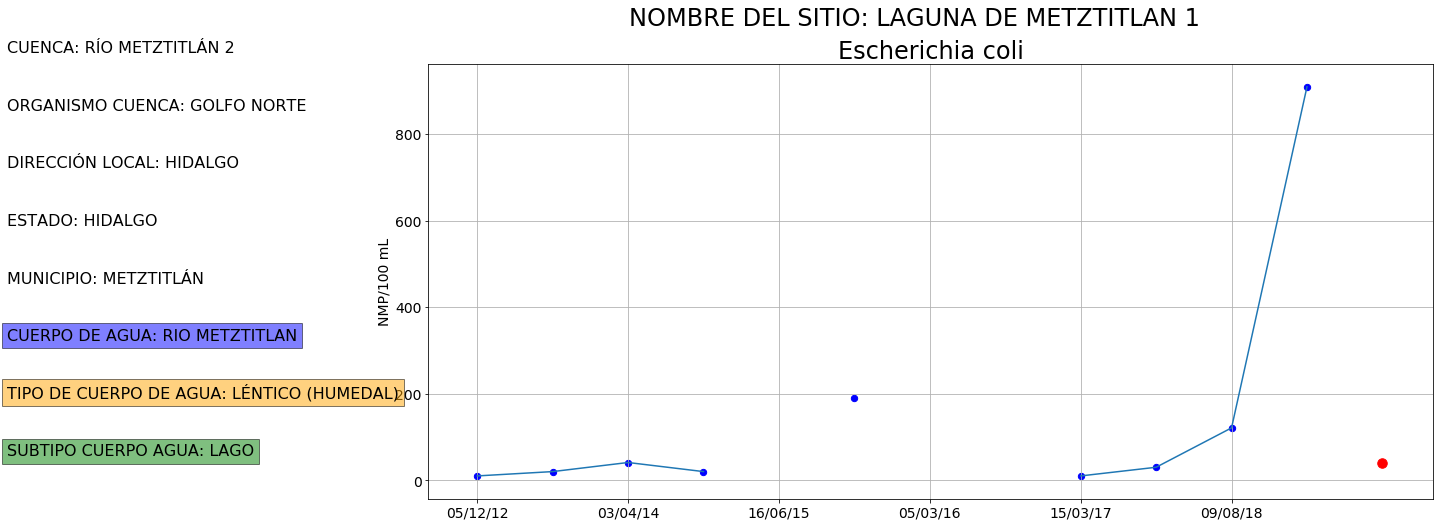

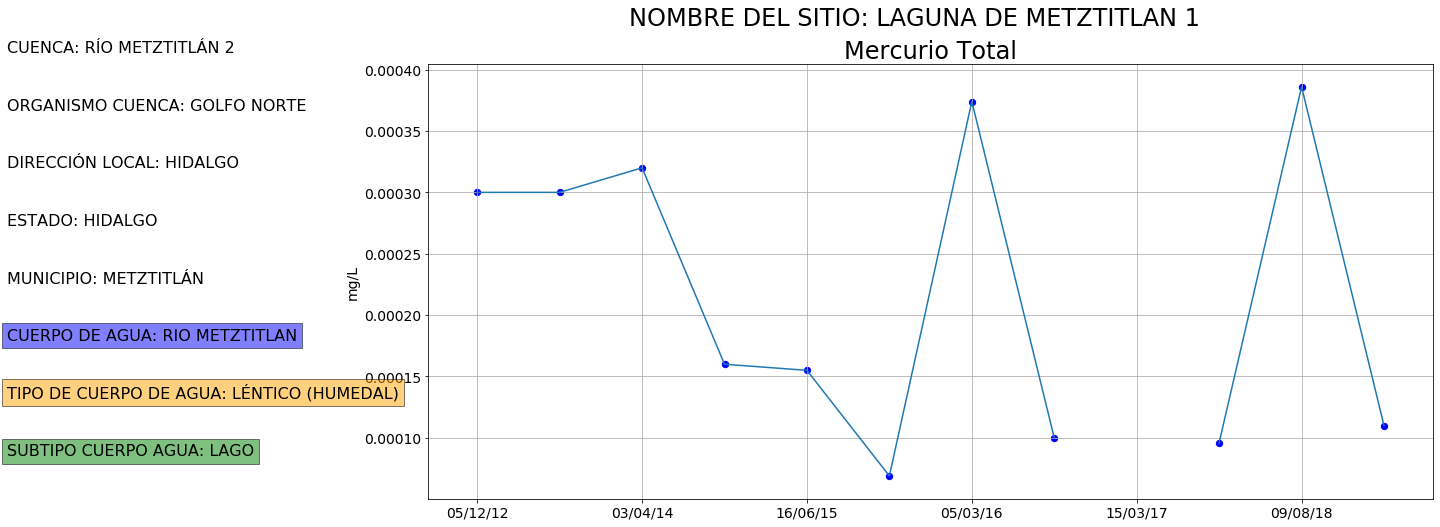

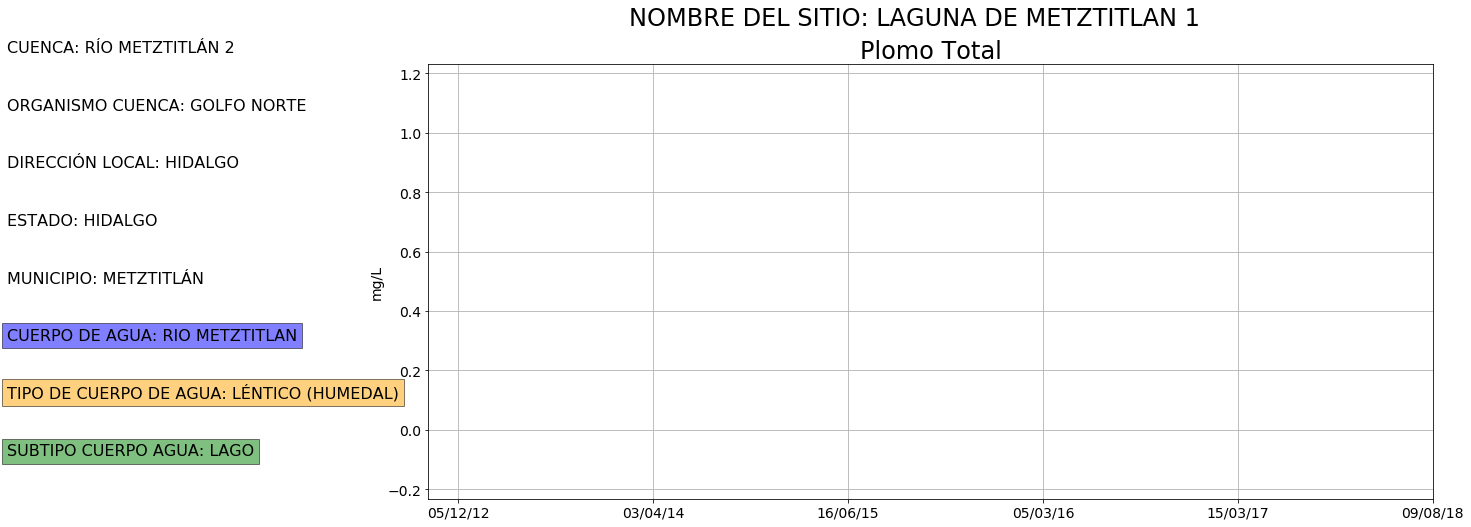

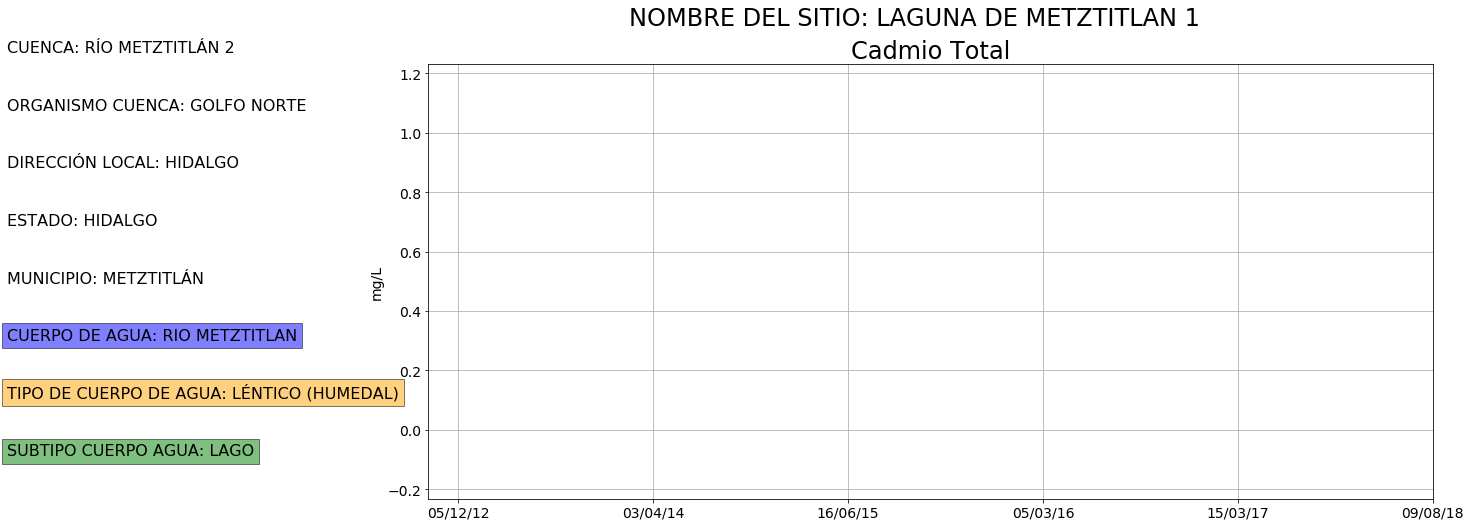

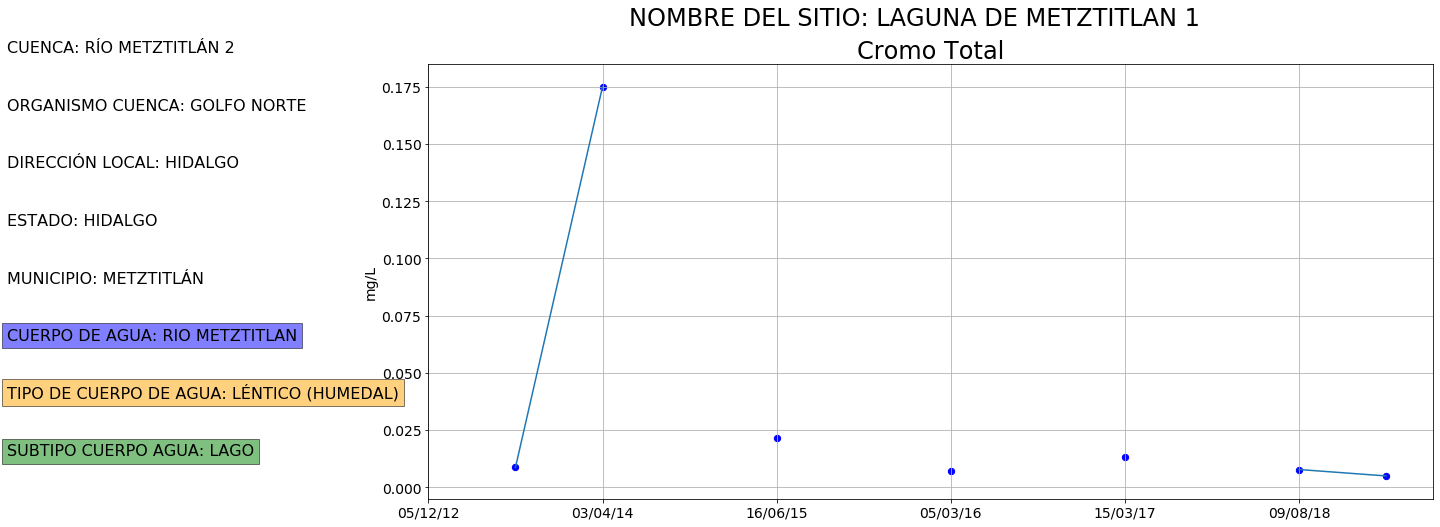

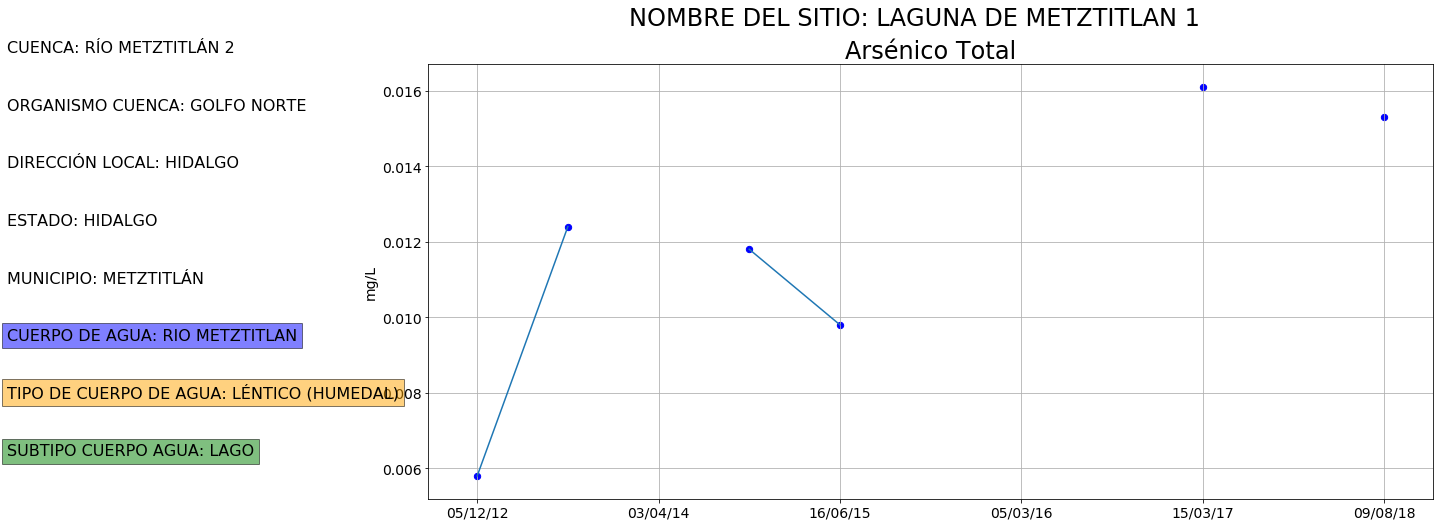

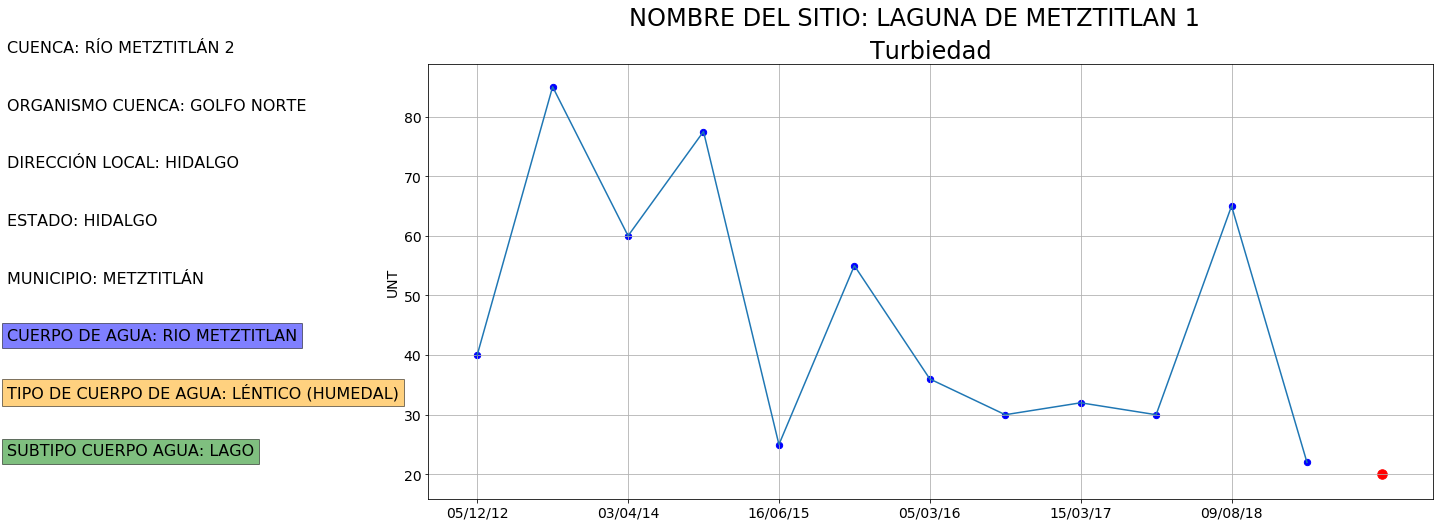

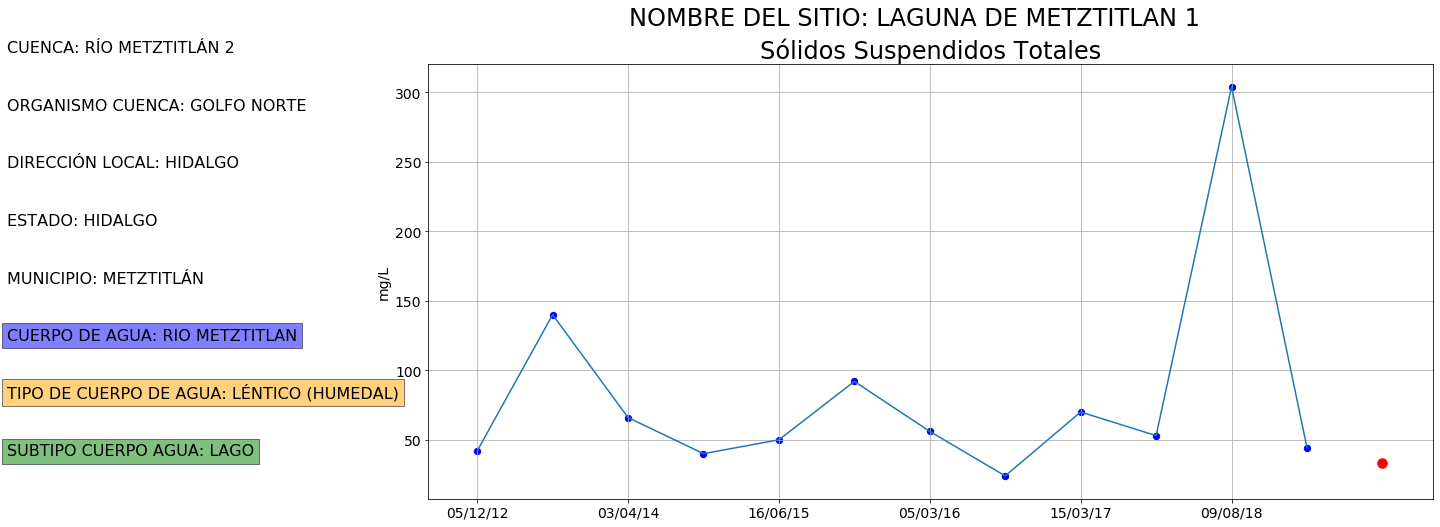

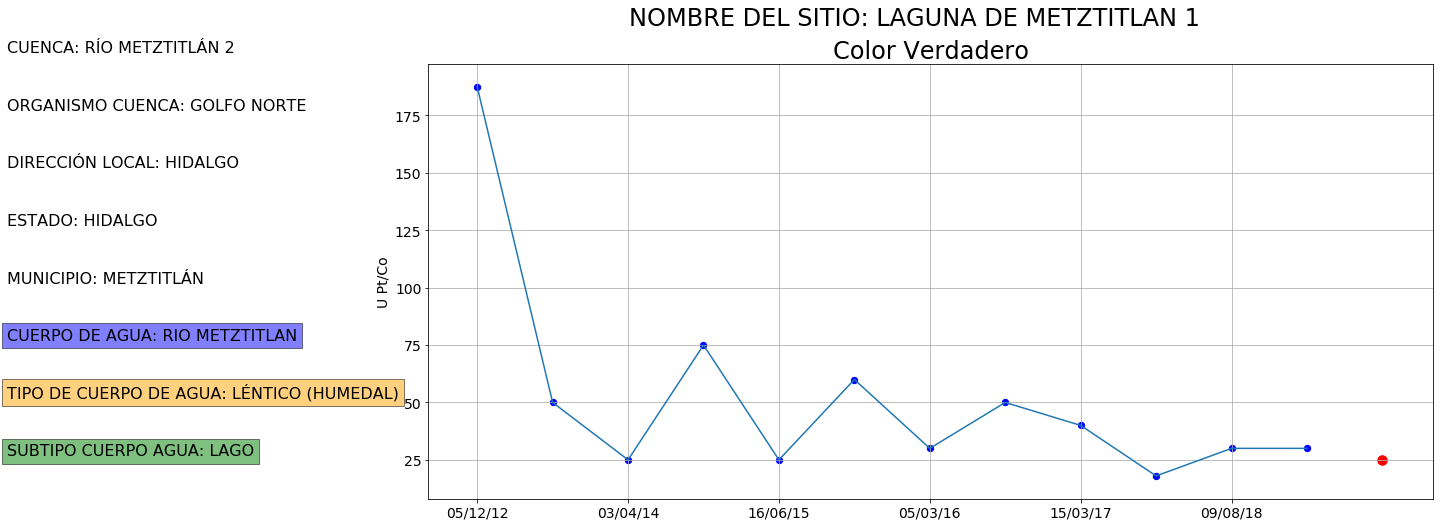

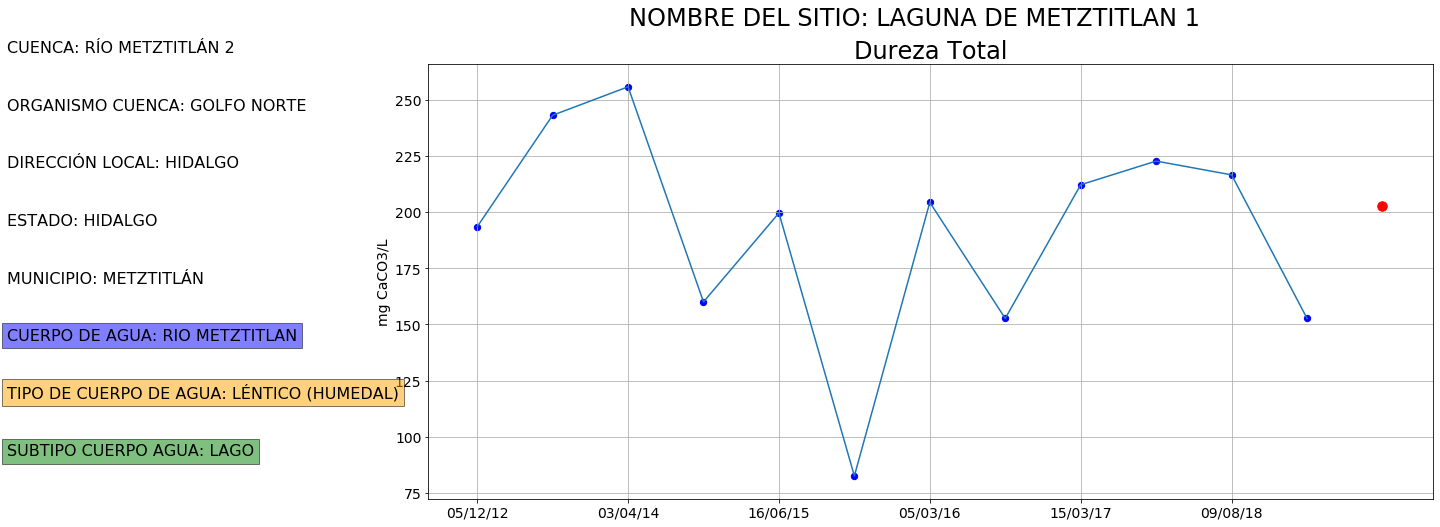

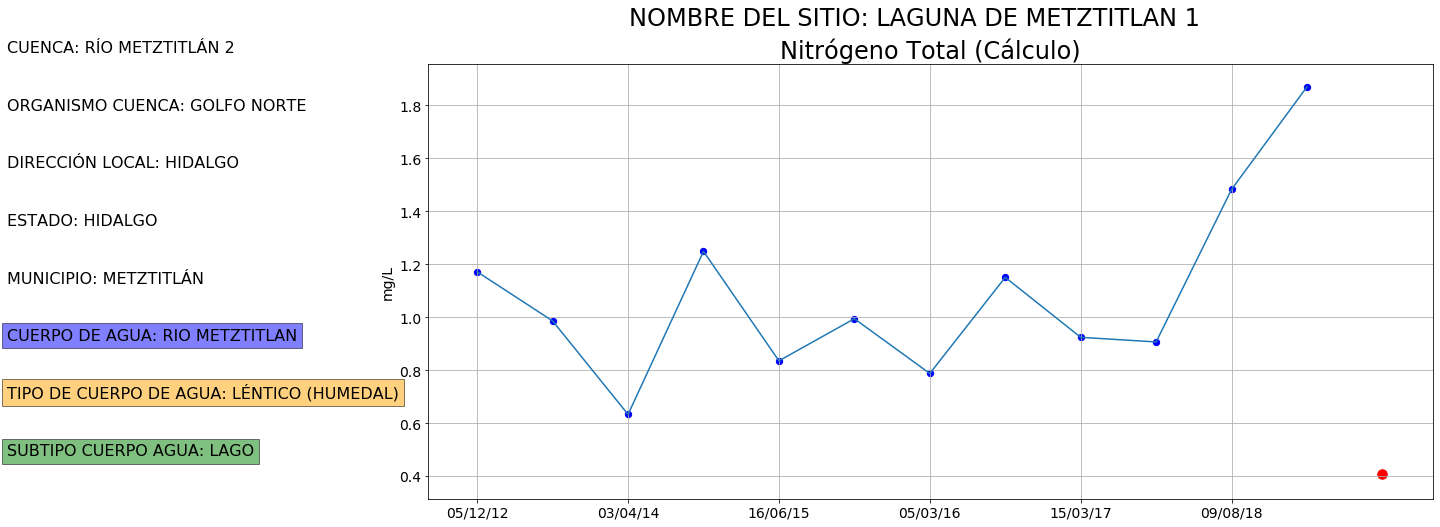

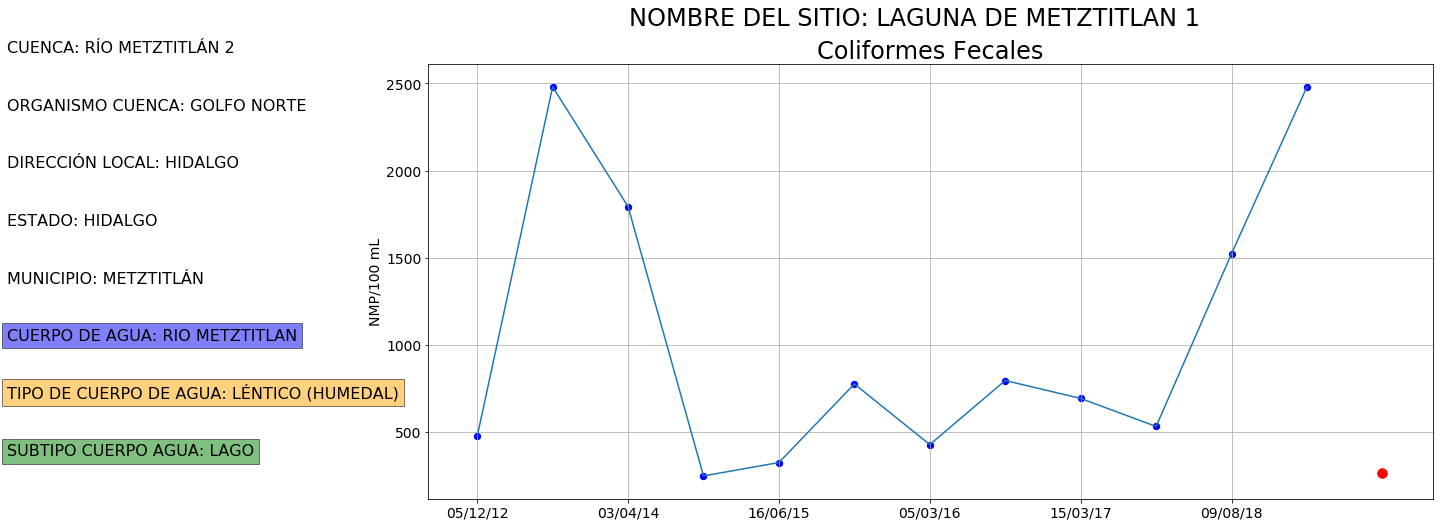

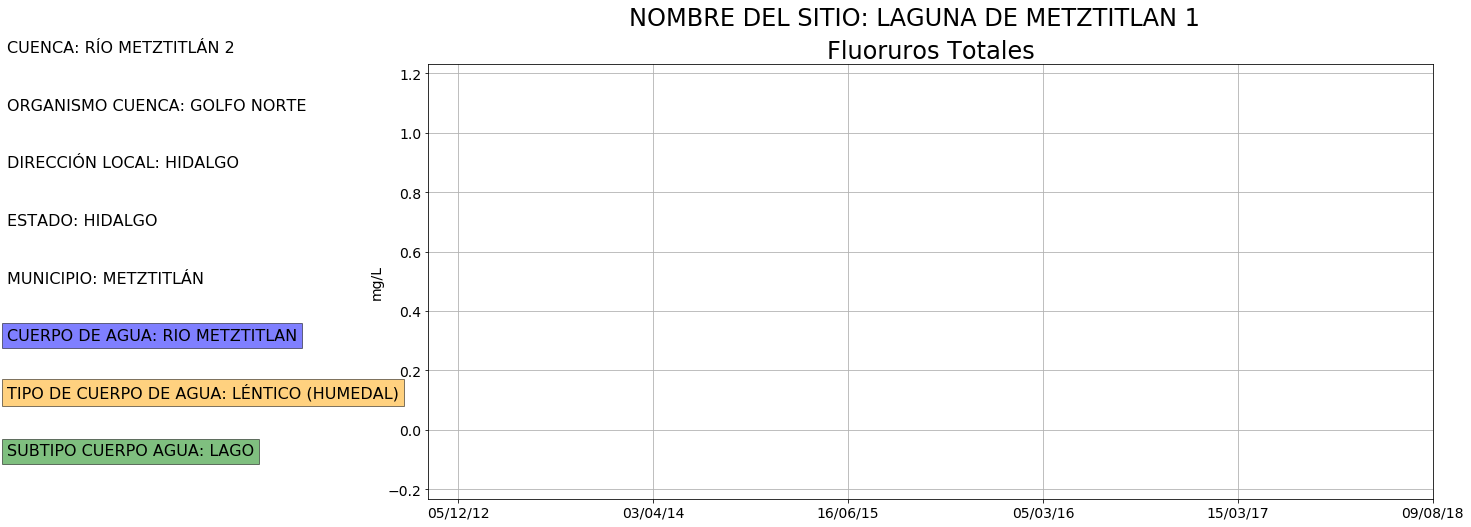

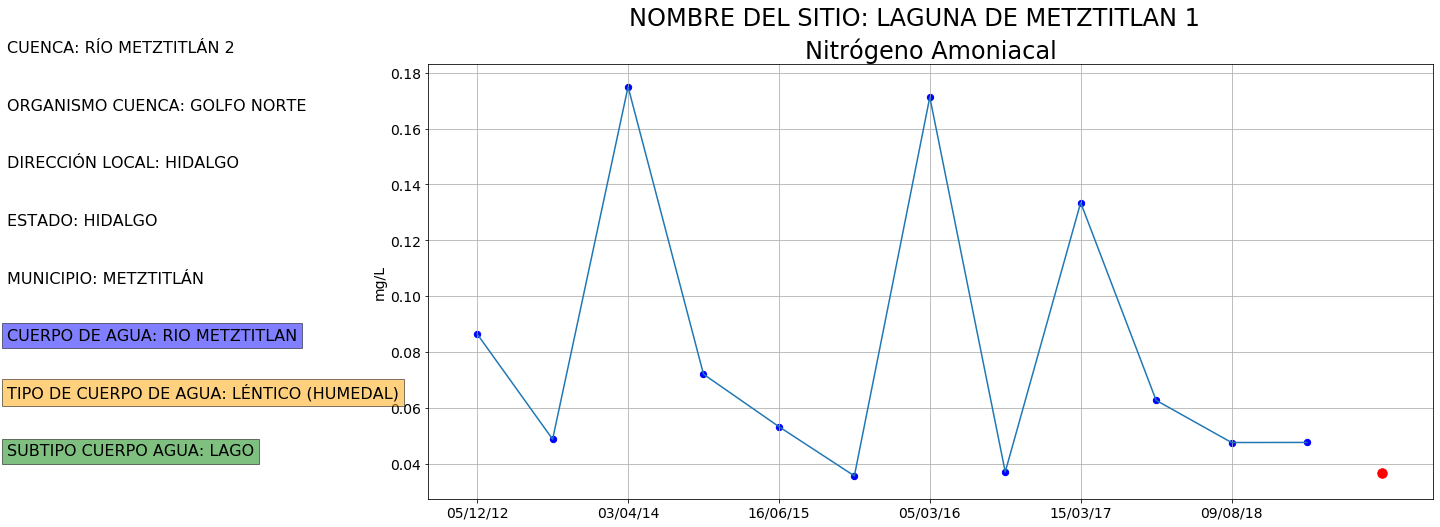

In [126]:
cols = ['SAAM','OD_mg/L','COLI_TOT','pH_CAMPO','TEMP_AGUA','NI_TOT','E_COLI','HG_TOT','PB_TOT',
        'CD_TOT','CR_TOT','AS_TOT','TURBIEDAD','SST','COLOR_VER','DUR_TOT','N_TOT','COLI_FEC',
        'FLUORUROS_TOT','N_NH3'] # No hay en la "hoja_etiquetas" fosfóro total, nitratos, nitritos. 


for i in range (0,3):#index of sitios
    df_Metztitlan = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN")]
    nombre_sitio = df_Metztitlan["NOMBRE DEL SITIO"].array[i]
    index_namecols = df_Metztitlan.iloc[:,:]
    subtitulo = index_namecols.columns[1]+': '+nombre_sitio
    subtitulo_2 = index_namecols.columns[2]+': '+index_namecols.iloc[0+i,2]
    subtitulo_5 = index_namecols.columns[5]+': '+index_namecols.iloc[0+i,5]
    subtitulo_6 = index_namecols.columns[6]+': '+index_namecols.iloc[0+i,6]
    subtitulo_7 = index_namecols.columns[7]+': '+index_namecols.iloc[0+i,7]
    subtitulo_8 = index_namecols.columns[8]+': '+index_namecols.iloc[0+i,8]
    subtitulo_9 = index_namecols.columns[9]+': '+index_namecols.iloc[0+i,9]
    subtitulo_10 = index_namecols.columns[10]+': '+index_namecols.iloc[0+i,10]
    subtitulo_11 = index_namecols.columns[11]+': '+index_namecols.iloc[0+i,11]
    
    
    for j in range(len(cols)):#index of cols variable
    #for j in range(0,2):
        df_rows = df_eti[df_eti['CLAVE PARÁMETRO'] == cols[j]]
        titulo = df_rows['NOMBRE DEL PARÁMETRO']
        titulo = df_rows.iloc[0,1]
        
        
        df_res[cols[j]] = pd.to_numeric(df_res[cols[j]], downcast="float",errors='coerce')
        df_res_2019[cols[j]] = pd.to_numeric(df_res_2019[cols[j]], downcast="float",errors='coerce')
        df_cuerpo_de_agua = df_sit[df_sit["CUERPO DE AGUA"].str.contains("METZTITLAN")]        

        key_array_df = df_cuerpo_de_agua["CLAVE SITIO"].array[i]
        serie = df_res[df_res["CLAVE SITIO"].str.contains(key_array_df)]
        serie_2019 = df_res_2019[df_res_2019["CLAVE SITIO"].str.contains(key_array_df)]
        serie[cols[j]].replace('\< | \>', '')
        serie_2019[cols[j]].replace('\< | \>', '')
        serie[cols[j]].dropna()        
        serie_2019[cols[j]].dropna()        

        rcParams['figure.figsize'] = 18, 8
        plt.figure()
        plt.title(titulo, fontsize=24)
        plt.suptitle(subtitulo, fontsize=24)
        
        #plt.figtext(0.5, 0.01, "one text and next text", ha="center", fontsize=18)#, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
        plt.figtext(-0.2, 0.9, subtitulo_2, ha="left", fontsize=16)#, bbox={"facecolor":"blue", "alpha":0.1, "pad":})
        plt.figtext(-0.2, 0.8, subtitulo_5, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.7, subtitulo_6, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.6, subtitulo_7, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.5, subtitulo_8, ha="left", fontsize=16)
        plt.figtext(-0.2, 0.4, subtitulo_9, ha="left", fontsize=16, bbox={"facecolor":"blue", "alpha":0.5, "pad":5})
        plt.figtext(-0.2, 0.3, subtitulo_10, ha="left", fontsize=16, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
        plt.figtext(-0.2, 0.2, subtitulo_11, ha="left", fontsize=16, bbox={"facecolor":"green", "alpha":0.5, "pad":5})
     
        plt.plot(serie['FECHA'], serie[cols[j]])
        plt.plot(serie_2019['FECHA REALIZACIÓN'], serie_2019[cols[j]])
        plt.scatter(serie['FECHA'], serie[cols[j]], marker='o',color='blue', s=40)
        plt.scatter(serie_2019['FECHA REALIZACIÓN'], serie_2019[cols[j]], marker='o',color='red', s=90)
        plt.xticks(np.arange(0, serie.shape[0], step=serie.shape[0]/6), fontsize=14) #Numberlines, nnumberlines/6
        plt.yticks(fontsize=14)
        plt.ylabel(df_rows.iloc[0,2], fontsize=14)
        plt.grid()    